In [3]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import powerlaw as pwl
from myutils.utilities import *
import pycop
import seaborn as sns
import openturns as ot
import openturns.viewer as viewer
from local_utils import *
import statsmodels.api as sm
from itertools import cycle

In [4]:
def find_key(b,s,test=False):
    for key, simu in sim_results.items():
        if test:
            print(f"{key} : b = {simu['b']}, s = {simu['s']}")

        if simu['b'] == b and simu['s'] == s:
            key_to_return = key

    return key_to_return



B = 5.5

def set_size(w,h, ax=None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)



In [5]:
# b = 6
# plt.rcParams.update({
#     "text.usetex": True,           # Enable LaTeX for text rendering
#     "font.family": "serif",        # Use serif font
#     "font.size": 20,               # Set font size
#     # "figure.figsize": (10, 10/1.5), # Figure size (matches LaTeX document width)
#     'figure.figsize': (1.620*b,b),
#     "figure.dpi": 100,             # High resolution for clarity
#     "savefig.dpi": 500,            # High resolution for saving
#     "axes.linewidth": 1.0,         # Thickness of axes lines
#     "axes.grid": True,             # Enable grid globally
#     "axes.grid.which": "major",    # Apply grid to both major and minor ticks
#     "grid.color": "gray",          # Grid line color
#     "grid.linestyle": "-",         # Grid line style
#     "grid.linewidth": 0.2,         # Grid line thickness
#     "grid.alpha": 0.7,             # Grid transparency
#     "axes.labelweight": "bold",    # Bold axis labels
#     "axes.labelsize":20,
#     "axes.titleweight": "bold",    # Bold titles
#     "legend.fontsize": "large",    # Larger legend text
#     "xtick.labelsize": 20,         # X-tick label size
#     "ytick.labelsize": 20,         # Y-tick label size
#     "xtick.direction": "in",       # Ticks pointing inwards
#     "ytick.direction": "in",
#     "xtick.major.size": 5,         # Major tick size
#     "ytick.major.size": 5,
#     "xtick.minor.size": 3,         # Minor tick size
#     "ytick.minor.size": 3,
#     "legend.fontsize":20,
#     "legend.frameon": True,
#     "legend.framealpha": 0.8,    # Transparency of legend box (1 = opaque, 0 = fully transparent)
#     "legend.facecolor": "white", # Background color of the legend box
#     # "legend.edgecolor": "black", # Border color of the legend box
#     "legend.borderpad": 0.3,     # Padding inside the legend box
#     "legend.labelspacing": 0.3,  # Space between legend entries
#     "legend.handlelength": 2,    # Length of legend handles (line, marker)
#     "legend.handletextpad": 0.5, # Space between handle and label
#     "legend.loc": "best",        # Default position of the legend
#     "legend.columnspacing": 1.0, # Space between legend columns
#     "lines.markeredgecolor": "black", # Marker edge color
#     "lines.markeredgewidth": 0.8, # Marker edge width
#     "lines.markersize": 6,        # Marker size

# })
def std_rc():
    b = 5.5
    plt.rcParams.update({
        "text.usetex": True,           # Enable LaTeX for text rendering
        "font.family": "serif",        # Use serif font
        "font.size":20,               # Set font size
        # "figure.figsize": (10, 10/1.5), # Figure size (matches LaTeX document width)
        'figure.figsize': (1.618*b,b),
        "figure.dpi": 100,             # High resolution for clarity
        "savefig.dpi": 500,            # High resolution for saving
        "axes.linewidth": 1.0,         # Thickness of axes lines
        "axes.grid": True,             # Enable grid globally
        "axes.grid.which": "major",    # Apply grid to both major and minor ticks
        "grid.color": "gray",          # Grid line color
        "grid.linestyle": "-",         # Grid line style
        "grid.linewidth": 0.2,         # Grid line thickness
        "grid.alpha": 0.7,             # Grid transparency
        "axes.labelweight": "bold",    # Bold axis labels
        "axes.labelsize":18,
        "axes.titleweight": "bold",    # Bold titles
        "legend.fontsize": "large",    # Larger legend text
        "xtick.labelsize":20,         # X-tick label size
        "ytick.labelsize":20,         # Y-tick label size
        "xtick.direction": "in",       # Ticks pointing inwards
        "ytick.direction": "in",
        "xtick.major.size": 5,         # Major tick size
        "ytick.major.size": 5,
        "xtick.minor.size": 3,         # Minor tick size
        "ytick.minor.size": 3,
        "legend.fontsize":18,
        "legend.frameon": True,
        "legend.framealpha": 0.8,    # Transparency of legend box (1 = opaque, 0 = fully transparent)
        "legend.facecolor": "white", # Background color of the legend box
        # "legend.edgecolor": "black", # Border color of the legend box
        "legend.borderpad": 0.3,     # Padding inside the legend box
        "legend.labelspacing": 0.3,  # Space between legend entries
        "legend.handlelength": 2,    # Length of legend handles (line, marker)
        "legend.handletextpad": 0.5, # Space between handle and label
        "legend.loc": "best",        # Default position of the legend
        "legend.columnspacing": 1.0, # Space between legend columns
        "lines.markeredgecolor": "black", # Marker edge color
        "lines.markeredgewidth": 0.8, # Marker edge width
        "lines.markersize": 6,        # Marker size

    })

std_rc()


In [6]:

def set_size(w,h, ax=None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)
def std_rc():
    b = 5.5
    plt.rcParams.update({
        "text.usetex": True,           # Enable LaTeX for text rendering
        "font.family": "serif",        # Use serif font
        "font.size":20,               # Set font size
        # "figure.figsize": (10, 10/1.5), # Figure size (matches LaTeX document width)
        'figure.figsize': (1.618*b,b),
        "figure.dpi": 100,             # High resolution for clarity
        "savefig.dpi": 500,            # High resolution for saving
        "axes.linewidth": 1.0,         # Thickness of axes lines
        "axes.grid": True,             # Enable grid globally
        "axes.grid.which": "major",    # Apply grid to both major and minor ticks
        "grid.color": "gray",          # Grid line color
        "grid.linestyle": "-",         # Grid line style
        "grid.linewidth": 0.2,         # Grid line thickness
        "grid.alpha": 0.7,             # Grid transparency
        "axes.labelweight": "bold",    # Bold axis labels
        "axes.labelsize":18,
        "axes.titleweight": "bold",    # Bold titles
        "legend.fontsize": "large",    # Larger legend text
        "xtick.labelsize":20,         # X-tick label size
        "ytick.labelsize":20,         # Y-tick label size
        "xtick.direction": "in",       # Ticks pointing inwards
        "ytick.direction": "in",
        "xtick.major.size": 5,         # Major tick size
        "ytick.major.size": 5,
        "xtick.minor.size": 3,         # Minor tick size
        "ytick.minor.size": 3,
        "legend.fontsize":18,
        "legend.frameon": True,
        "legend.framealpha": 0.8,    # Transparency of legend box (1 = opaque, 0 = fully transparent)
        "legend.facecolor": "white", # Background color of the legend box
        # "legend.edgecolor": "black", # Border color of the legend box
        "legend.borderpad": 0.3,     # Padding inside the legend box
        "legend.labelspacing": 0.3,  # Space between legend entries
        "legend.handlelength": 2,    # Length of legend handles (line, marker)
        "legend.handletextpad": 0.5, # Space between handle and label
        "legend.loc": "best",        # Default position of the legend
        "legend.columnspacing": 1.0, # Space between legend columns
        "lines.markeredgecolor": "black", # Marker edge color
        "lines.markeredgewidth": 0.8, # Marker edge width
        "lines.markersize": 6,        # Marker size
    
    })
   

std_rc()



In [7]:

# Define a wrapper function for saving figures with bbox_inches='tight'
def save_figure(fig, filename):
    fig.savefig(filename, bbox_inches='tight')


# fig_path = '/home/claudio/tesi/manuscript/final_figures'
fig_path = '/home/claudio/tesi/Template2/final_figures'
# fig_path = './wait'

save = True
put_title = True

In [8]:
txns_fn = '/home/claudio/tesi/sarafu/final_data/00_tx_with_bal_bwd_allpositivebalances.csv'
TXDF = pd.read_csv(txns_fn,sep=",",header=0,dtype={'id': 'int',
                                                    'date': 'string',
                                                    'type': 'category',
                                                    'source_xdai': 'string',
                                                    'target_xdai': 'string',
                                                    'weight': 'float',
                                                    'source_bal_pre': 'float',
                                                    'source_bal_post': 'float',
                                                    'target_bal_pre': 'float',
                                                    'target_bal_post': 'float',
                                                    'source': 'int',
                                                    'target': 'int',
                                                    'source_role': 'category',
                                                    'target_role': 'category',
                                                    'right_weight': 'bool',
                                                    'frac_out': 'float',
                                                    'frac_in': 'float',
                                                    'frac_out_post': 'float',
                                                    'frac_in_post': 'float'}
 )

users_fn = '/home/claudio/tesi/sarafu/final_data/03_users_adjusted_allpositivebalances.csv'
USERS = pd.read_csv(users_fn,  # assuming 'user_fn' is your file name
                      sep=",",
                      header=0,
                      dtype={'id': 'int',
                             'start': 'string',
                             'final_bal': 'float',
                             'gender': 'category',
                             'area_name': 'string',
                             'area_type': 'category',
                             'role': 'category',
                             'business': 'category',
                             'poa': 'string',
                             'xdai': 'string',
                             'ovol_in': 'float',
                             'ovol_out': 'float',
                             'otxns_in': 'int',
                             'otxns_out': 'int',
                             'ounique_in': 'int',
                             'ounique_out': 'int',
                             'svol_in': 'float',
                             'svol_out': 'float',
                             'stxns_in': 'int',
                             'stxns_out': 'int',
                             'sunique_in': 'int',
                             'sunique_out': 'int',
                             'crid': 'int',
                             'net': 'float',
                             'initial_bal': 'float',
                             'min_bal': 'float'}) 

TXDF.drop(columns=['Unnamed: 0'],inplace=True)
USERS.drop(columns=['Unnamed: 0'],inplace=True)

formats = ['%Y-%m-%d %H:%M:%S.%f', '%Y-%m-%d %H:%M:%S', '%Y-%m-%d']
for fmt in formats:
    USERS.start = pd.to_datetime(USERS.start, format=fmt, errors='coerce').fillna(USERS.start)
USERS = USERS.sort_values(by='start')

for fmt in formats:
    TXDF.date = pd.to_datetime(TXDF.date, format=fmt, errors='coerce').fillna(TXDF.date)
TXDF = TXDF.sort_values(by='date')

# Define the precision
PRECISION = 3

# Identify columns to exclude (those starting with "frac_")
columns_to_exclude = TXDF.filter(like="frac_").columns

# Identify columns to round (all except those starting with "frac_")
columns_to_round = TXDF.columns.difference(columns_to_exclude)

# Apply rounding only to the selected columns in TXDF
TXDF[columns_to_round] = round_df(TXDF[columns_to_round], PRECISION)

# Apply rounding to all columns in USERS
USERS = round_df(USERS, PRECISION)


In [9]:
END = pd.to_datetime(TXDF.date.max()) #*2021-06-15 05:00:30.887568
START = pd.to_datetime(TXDF.date.min()) #*2020-01-25 19:13:17.731529
NUM_PERIODS = 20
BAD_USERS = [8356,8357,21712,54998]


In [10]:
standard_tx = lambda tx: tx.type == 'STANDARD'
good_users = lambda tx: ~tx.source.isin(BAD_USERS) | ~tx.target.isin(BAD_USERS)
std_roles = lambda tx: tx.source_role.isin(['BENEFICIARY','GROUP_ACCOUNT','VENDOR']) & tx.target_role.isin(['BENEFICIARY','GROUP_ACCOUNT','VENDOR'])   
standard = lambda tx: standard_tx(tx) & good_users(tx) & std_roles(tx)

standard_users = lambda usr : usr.role.isin(['BENEFICIARY','GROUP_ACCOUNT','VENDOR'])
validated = lambda usr: ~usr.crid.isin(BAD_USERS)


disbursement = lambda tx: tx.type == 'DISBURSEMENT'
withdrawal = lambda tx: tx.type.isin(['RECLAMATION','AGENT_OUT'])

from_kinango = lambda tx: tx.source_area == 'Kinango Kwale'
to_kinango = lambda tx: tx.target_area == 'Kinango Kwale'
just_kinango = lambda tx: from_kinango(tx) & to_kinango(tx) 

from_mukuru = lambda tx: tx.source_area == 'Mukuru Nairobi'
to_mukuru = lambda tx: tx.target_area == 'Mukuru Nairobi'
just_mukuru = lambda tx: from_mukuru(tx) & to_mukuru(tx) 


#BalanceS DFS FILTERS
balxmin = lambda bal,feat,tau: bal[feat]>=tau
balxinf = lambda bal,feat,tau: bal[feat]>tau
balxmax = lambda bal,feat,tau: bal[feat]<=tau
balxsup = lambda bal,feat,tau: bal[feat]<tau

#AGENTS DFS FILTERS
agxmin = lambda ag,feat,tau: ag[feat]>=tau
agxinf = lambda ag,feat,tau: ag[feat]>tau
agxmax = lambda ag,feat,tau: ag[feat]<=tau
agxsup = lambda ag,feat,tau: ag[feat]<tau

# Sarafu Handling

In [11]:
txdf = TXDF.copy(deep=True)
tx = txdf[(txdf["type"] == "STANDARD") & #keeping just standard transactions
           (txdf["weight"] >= 1.0) & #keeping just transactions with weight >= 1.0
           (txdf["source_role"].isin(["BENEFICIARY", "GROUP_ACCOUNT", "VENDOR"])) & #keeping transactions made by these type of users
           (txdf["target_role"].isin(["BENEFICIARY", "GROUP_ACCOUNT", "VENDOR"]))  #keeping transactions received by these type of users
        ]
agents_outer = basic_agents(tx,USERS.copy(deep=True),how='outer') #create agent dataframe
agents = agents_outer[(agents_outer['tx_in'] > 0) & (agents_outer['tx_out'] > 0)]
filtered_crid = agents.crid.unique() 
tx = tx.loc[(tx.target.isin(filtered_crid))&(tx.source.isin(filtered_crid))]

In [10]:
all_balances = balance_constructor(TXDF[['date','source','target','source_bal_post','target_bal_post','type','id','weight']])

all_balances['period'] = pd.cut(all_balances.date, bins=20,labels=False) #period by date

filtered_balances = all_balances.loc[(all_balances.crid.isin(filtered_crid)) 
                                     & (all_balances.type == 'STANDARD') 
                                     & (all_balances.weight >= 1)]

bal_pivot = pd.pivot_table(filtered_balances, index='crid',columns='period', values='balance', aggfunc='last')
bal_pivot = bal_pivot.ffill(axis=1)
bal_pivot = bal_pivot[bal_pivot>=1]



In [11]:
sarafu = {
        "transactions": tx,
        "agents": agents,
        "balances": all_balances,
        "filtered_balances": filtered_balances,
        "balance_pivot": bal_pivot
    }

In [12]:
# serie = sarafu['balance_pivot'].iloc[:,-1]
# print(serie[serie == 0].count() / serie.count())
# serie_01 = serie[(serie>=0) & (serie<=1)]
# print(serie_01.nsmallest(255).unique())
# print(serie_01.count()/serie.count())

# print("Final balances (Sarafu) less than 1 are less than 1%")

# Import simulation

In [13]:
import os
import json
import pandas as pd

folder_path = '/home/claudio/tesi/sarafu/final_simulations/008'
# folder_path = '/home/claudio/tesi/sarafu/final_simulations/03_fit_actattr_change_s_param'

files = os.listdir(folder_path)

# Identify JSON and Parquet files
json_files = [f for f in files if f.endswith('_metadata.json')]
parquet_files = [f for f in files if f.endswith('.parquet')]

# Pair Parquet and JSON files
paired_files = []
for parquet in parquet_files:
    identifier = parquet.split('.parquet')[0]
    json_file = f"{identifier}_metadata.json"
    if json_file in json_files:
        paired_files.append((parquet, json_file))

# Extract metadata from paired JSON files
metadata_list = [
    json.load(open(os.path.join(folder_path, pair[1]))) for pair in paired_files
]




METADATA_DF = pd.DataFrame(metadata_list)

metadata_df = METADATA_DF.copy(deep=True)
# metadata_df = metadata_df[metadata_df['T'] != 2]

# Ensure all columns contain hashable types (e.g., strings for lists)
metadata_df = metadata_df.map(lambda x: tuple(x) if isinstance(x, list) else x)

# metadata_df = metadata_df.set_index('s').sort_index()


In [14]:
# metadata_df = metadata_df.loc[~metadata_df.s.isin([25000,25000000])]

In [15]:
# dfg = pd.read_parquet('/home/claudio/tesi/sarafu/final_simulations/007/3.parquet')
# dfg.sort_values('timestamp',inplace=True)
# dfg.reset_index(inplace=True,drop=True)
# dfg['scaled_time'] = dfg.timestamp - dfg.timestamp.iloc[0] +first_renewal_time
# dfg['date'] = pd.to_datetime(dfg.timestamp, unit='s')
# dfg['correct_date'] = pd.to_timedelta(dfg.scaled_time, unit='s') + START

# dfg

In [16]:
# metadata_df = metadata_d.loc[metadata_df.s.isin([1,5,10,20,250])]

In [17]:
metadata_df = metadata_df.loc[metadata_df.s.isin([1,5,10,20,250])]

first_renewal_time = (sarafu['transactions'].date.min() - START).total_seconds()


# Dictionary to store processed data per simulation
sim_results = {}

# Iterate over all metadata entries 
for idx, row in metadata_df.iterrows():
    simulation_id = row['simulation_id']
    print(f'{folder_path}/{simulation_id}.parquet')
    # Load transaction data
    df = pd.read_parquet(f'{folder_path}/{simulation_id}.parquet')
    df.sort_values('timestamp',inplace=True)
    df.reset_index(inplace=True,drop=True)
    df['scaled_time'] = df.timestamp - df.timestamp.iloc[0] +first_renewal_time
    df['date'] = pd.to_datetime(df.timestamp, unit='s')
    df['correct_date'] = pd.to_timedelta(df.scaled_time, unit='s') + START
    df = df.rename(columns={'amount': 'weight'})
    df['frac_out'] = df.weight / (df.source_bal + df.weight) 
    df['frac_in'] = df.weight / (df.target_bal - df.weight) 
    df = df[df.weight >= 1]

    # Create users dataframe
    agents = basic_agents(df, how='inner')
    filtered_crid = agents.crid.unique()

    # Process balances
    all_balances = balance_constructor_v2(df)
    all_balances['period'] = pd.cut(all_balances.date, bins=20, labels=False)

    filtered_balances = all_balances.loc[(all_balances.crid.isin(filtered_crid)) 
                                         & (all_balances.weight >= 1) ]

    bal_pivot = pd.pivot_table(filtered_balances, index='crid', columns='period', values='balance', aggfunc='last')
    bal_pivot = bal_pivot.ffill(axis=1)

    # Store results in a structured way
    sim_results[simulation_id] = {
        "transactions": df,
        "agents": agents,
        "balances": all_balances,
        "filtered_balances": filtered_balances,
        "balance_pivot": bal_pivot,
        'metadata': row,
        'sim_index':idx,
        'sim_id':row.simulation_id,
        'b':row.burstiness,
        's':row.s
    }
    # sim_results = {k: v for k, v in sim_results.items()} #when the simulation id are just numbers
    sim_results = {i: v for i, (k,v) in enumerate(sim_results.items())}
    # sim_results = {}
    # print(row.simulation_id)



/home/claudio/tesi/sarafu/final_simulations/008/11.parquet
/home/claudio/tesi/sarafu/final_simulations/008/4.parquet
/home/claudio/tesi/sarafu/final_simulations/008/18.parquet
/home/claudio/tesi/sarafu/final_simulations/008/2.parquet
/home/claudio/tesi/sarafu/final_simulations/008/15.parquet
/home/claudio/tesi/sarafu/final_simulations/008/16.parquet
/home/claudio/tesi/sarafu/final_simulations/008/7.parquet
/home/claudio/tesi/sarafu/final_simulations/008/19.parquet
/home/claudio/tesi/sarafu/final_simulations/008/32.parquet
/home/claudio/tesi/sarafu/final_simulations/008/34.parquet
/home/claudio/tesi/sarafu/final_simulations/008/14.parquet
/home/claudio/tesi/sarafu/final_simulations/008/13.parquet
/home/claudio/tesi/sarafu/final_simulations/008/9.parquet
/home/claudio/tesi/sarafu/final_simulations/008/17.parquet
/home/claudio/tesi/sarafu/final_simulations/008/33.parquet
/home/claudio/tesi/sarafu/final_simulations/008/31.parquet
/home/claudio/tesi/sarafu/final_simulations/008/6.parquet
/h

In [17]:
df = sarafu['transactions']
time_from_start = (df.groupby('source').first().date-START)
# print(time_from_start)
iet=[]
for idx, group in df.groupby('source'):
    # print(group.date.diff().fillna(time_from_start.loc[idx]).dt.total_seconds().head(2))
    iet.extend(group.date.diff().fillna(time_from_start.loc[idx]).dt.total_seconds().values)


sarafu['iet'] = iet

In [54]:
temp = pd.DataFrame(sim_results).T
temp['iet'] = np.nan
temp['iet'] = temp['iet'].astype(object)  # Ensure it can hold lists
temp = temp.loc[temp.s == 20]


for jdk, row in temp.iterrows():
    df = row['transactions']
    # start = df.date.min() - pd.to_timedelta(0.300351, unit='s')
    time_from_start = (df.groupby('source').first().correct_date-START)
    iet=[]
    for idx, group in df.groupby('source'):
        iet.extend(group.correct_date.diff().fillna(time_from_start.loc[idx]).dt.total_seconds().values)
    # df['scaled_stamp'] = df.timestamp - df.timestamp.min()
    # first_stamp = df.timestamp.iloc[0]
    # iet=[]
    # for idx, group in df.groupby('source'):
    #     iet.extend(group.scaled_stamp.diff().fillna(group.scaled_stamp.min()).values)
    print(min(iet))
    temp.at[jdk, 'iet'] = iet

1.125133991
0.0
6.56e-07
2811.566407859
6.08e-06


In [19]:
for i,v in enumerate(metadata_df['s'].unique()):
    print(i,v)

0 10
1 1
2 20
3 5
4 250


In [18]:
markers = ['o', '<', 'D', '^', 's', 'h', '>', 'p', 'v', '*']

markers_dict_b = {v:markers[i] for i,v in enumerate(metadata_df['burstiness'].unique())}
markers_dict_s = {v:markers[i+5] for i,v in enumerate(metadata_df['s'].unique())}
# markers = cycle(['o', '<', 'D', '^', 'v', 's', '>', 'p', '*', 'h'])


# markers_dict_b = {v:next(markers) for i,v in enumerate(metadata_df['burstiness'].unique())}
# markers_dict_s = {v:next(markers) for i,v in enumerate(metadata_df['s'].unique())}



In [19]:
markers_dict_b,markers_dict_s

({np.float64(0.5): 'o',
  np.float64(5.0): '<',
  np.float64(1.0): 'D',
  np.float64(0.75): '^',
  np.float64(0.25): 's'},
 {np.int64(10): 'h',
  np.int64(1): '>',
  np.int64(20): 'p',
  np.int64(5): 'v',
  np.int64(250): '*'})

In [20]:
# colors = ['tab:orange', 'tab:cyan', 'tab:olive', 'tab:purple', 'tab:gray', 'tab:olive','tab:blue', 'tab:red',]
colors = ['tab:blue','tab:green','tab:orange','tab:red','tab:purple','gold','tab:pink']
colors_dict_b = {v:colors[i] for i,v in enumerate(metadata_df['burstiness'].unique())}
colors_dict_s = {v:colors[i] for i,v in enumerate(metadata_df['s'].unique())}

In [58]:
save = 0 

b = 1.0, min iet 1.125133991
b = 0.25, min iet 0.0
b = 0.5, min iet 6.56e-07
b = 5.0, min iet 2811.566407859
b = 0.75, min iet 6.08e-06


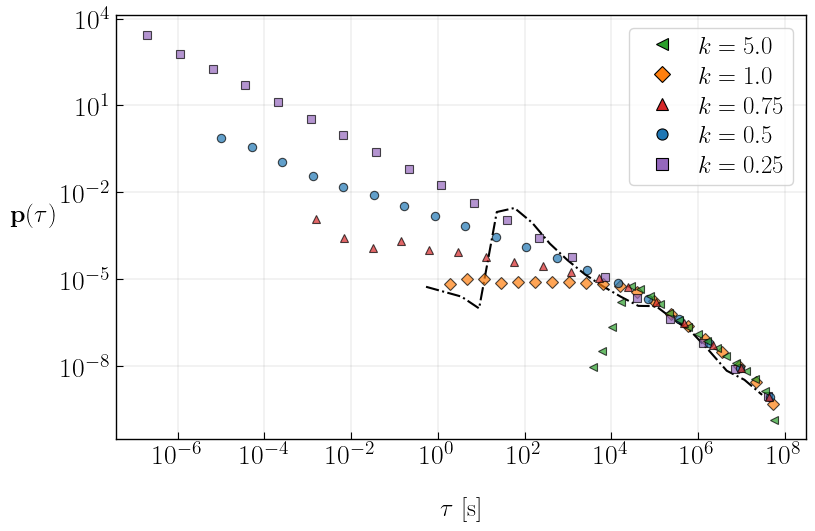

In [62]:
numbins = 51
fig, ax = plt.subplots()
density = True
log_bin = True
log_scale = False
# Plot the reference distribution
plot_distribution(sarafu['iet'], ax=ax, nbins=numbins-1, log_bin=log_bin, density=density, color='k', linestyle='-.', log_scale=log_scale)

# Store legend entries
legend_entries = []

for jdk, row in temp.iterrows():
    iet = pd.Series(row['iet'])
    iet = iet[iet >= 0]
    print(f"b = {row.metadata.burstiness}, min iet {iet.min()}")
    b = row['b']
    label = f'$k = {b}$'
    marker = markers_dict_b[b]
    color = colors_dict_b[b]

    # Plot the distribution
    plot_distribution(iet, ax=ax, nbins=numbins-1, log_bin=log_bin, density=density,
                      linestyle='', label=label, marker=marker, color=color, alpha=0.7,log_scale=log_scale)

    # Collect legend entries
    legend_entries.append((b, label, marker, color))

# Sort legend entries by b in descending order
legend_entries.sort(reverse=True, key=lambda x: x[0])

# Extract sorted handles and labels
sorted_labels = [entry[1] for entry in legend_entries]
sorted_markers = [entry[2] for entry in legend_entries]
sorted_colors = [entry[3] for entry in legend_entries]

# Manually create legend handles
sorted_handles = [plt.Line2D([0], [0], marker=m, color=c, linestyle='', markersize=8) 
                  for m, c in zip(sorted_markers, sorted_colors)]

# Set legend
ax.legend(sorted_handles, sorted_labels)

# Set labels
ax.set_xlabel(r'$\tau$ [s]', rotation=0, labelpad=20)
ax.set_ylabel(r'$\textbf{p}(\tau)$', rotation=0, labelpad=20)
# ax.loglog(False)
ax.semilogx()
ax.semilogy()

# Save the figure if required
if save:
    fig.savefig(f'{fig_path}/iet.png', bbox_inches='tight', pad_inches=0.1)

plt.show()


In [50]:
# numbins = 51
# fig, ax = plt.subplots()

# # Plot the reference distribution
# h0 = histogram(sarafu['iet'], log_bin=False, num_bins=numbins)
# ax.plot(h0[0], h0[1], color='k', linestyle='-.')
# # plot_distribution(sarafu['iet'], ax=ax, nbins=numbins-1, log_bin=False, density=True, color='k', linestyle='-.')

# # Store legend entries
# legend_entries = []

# for jdk, row in temp.iterrows():
#     iet = row['iet']
#     b = row['b']
#     label = f'$k = {b}$'
#     marker = markers_dict_b[b]
#     color = colors_dict_b[b]

#     # Plot the distribution
#     h = histogram(iet, log_bin=False, num_bins=numbins)
#     ax.plot(h[0], h[1], alpha=0.7, color=color, marker=marker,
#              linestyle='', label=label)
#     # ax.semilogy()
#     # ax.loglog()
#     # plot_distribution(iet, ax=ax, nbins=numbins-1, log_bin=False, density=True,
#                     #   linestyle='', label=label, marker=marker, color=color, alpha=0.7)

#     # Collect legend entries
#     legend_entries.append((b, label, marker, color))

# # Sort legend entries by b in descending order
# legend_entries.sort(reverse=True, key=lambda x: x[0])

# # Extract sorted handles and labels
# sorted_labels = [entry[1] for entry in legend_entries]
# sorted_markers = [entry[2] for entry in legend_entries]
# sorted_colors = [entry[3] for entry in legend_entries]

# # Manually create legend handles
# sorted_handles = [plt.Line2D([0], [0], marker=m, color=c, linestyle='', markersize=8) 
#                   for m, c in zip(sorted_markers, sorted_colors)]

# # Set legend
# ax.legend(sorted_handles, sorted_labels)

# # Set labels
# ax.set_xlabel(r'$\tau$', rotation=0, labelpad=20)
# ax.set_ylabel(r'$\textbf{p}(\tau)$', rotation=0, labelpad=20)

# # Save the figure if required
# if save:
#     fig.savefig(f'{fig_path}/iet.png', bbox_inches='tight', pad_inches=0.1)

# plt.show()


In [51]:
save =1

Saved /home/claudio/tesi/Template2/final_figures/frac_out_s10_b_var.png
Saved /home/claudio/tesi/Template2/final_figures/frac_out_s1_b_var.png
Saved /home/claudio/tesi/Template2/final_figures/frac_out_s20_b_var.png
Saved /home/claudio/tesi/Template2/final_figures/frac_out_s5_b_var.png
Saved /home/claudio/tesi/Template2/final_figures/frac_out_s250_b_var.png


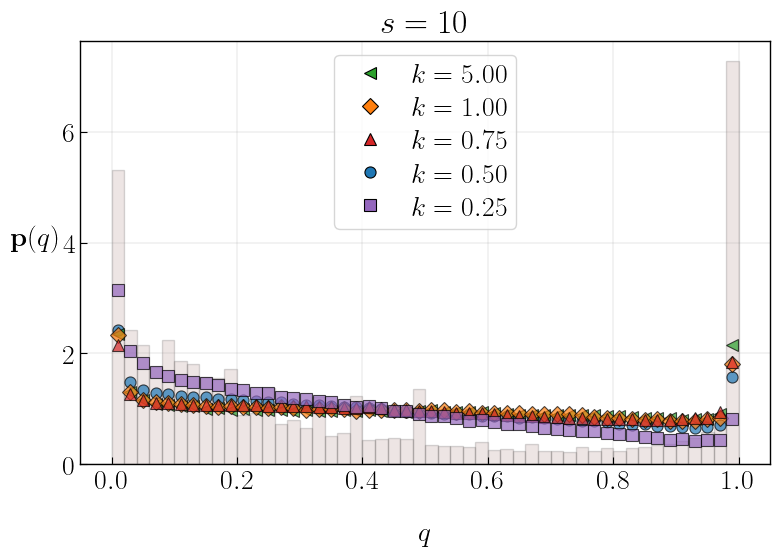

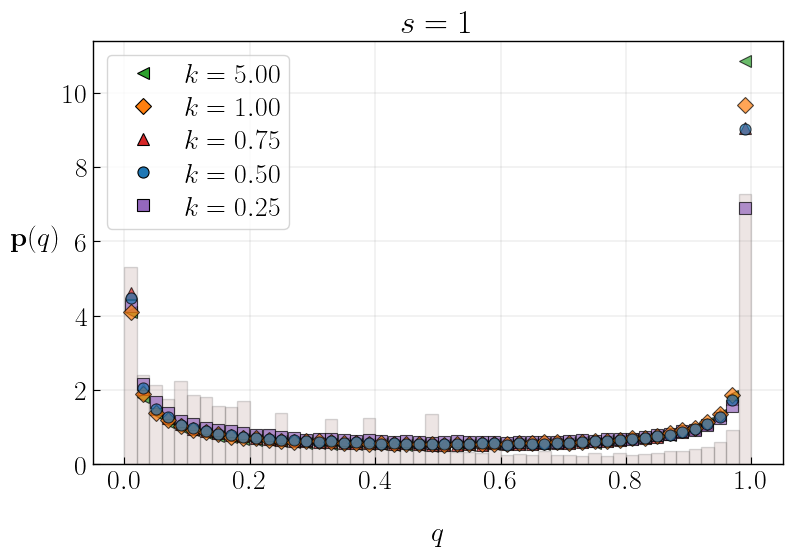

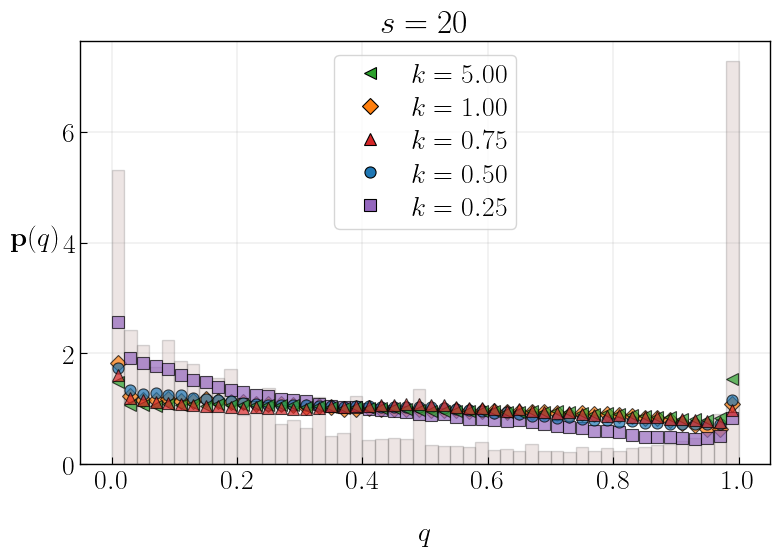

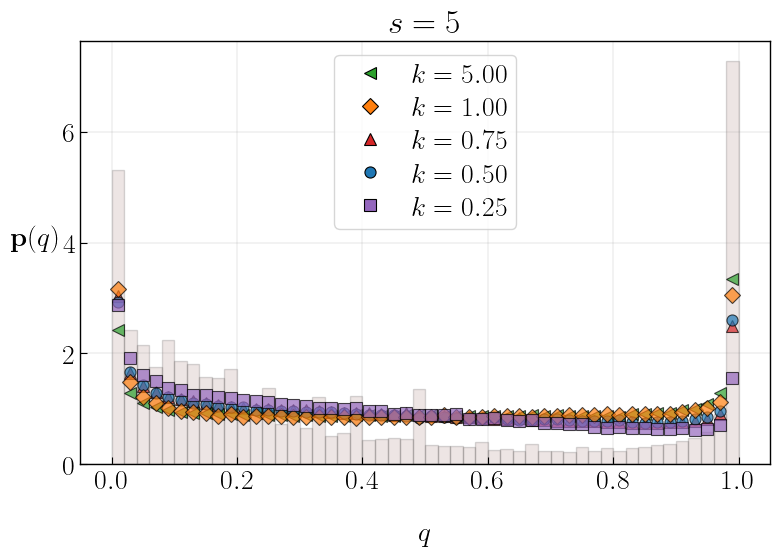

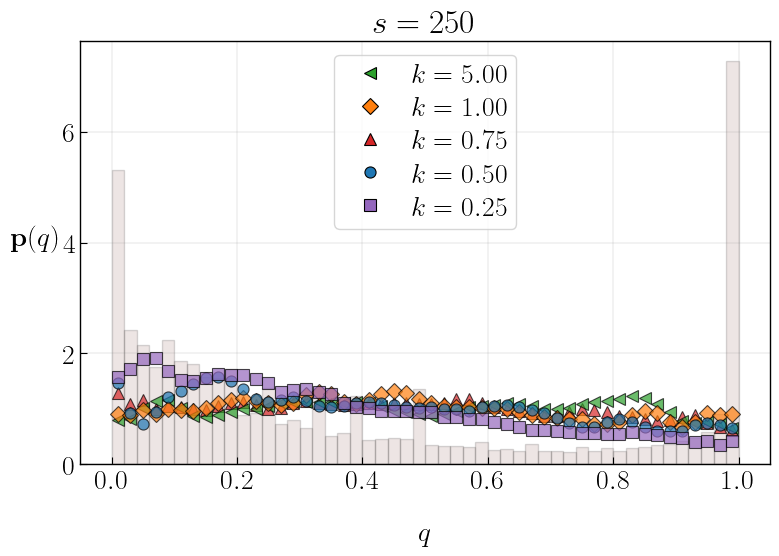

In [52]:
plots = [plt.subplots() for i in range(len(metadata_df['s'].unique()))]
plots_dict = {v: plots[i] for i, v in enumerate(metadata_df['s'].unique())}

nbins = 51

# Plot reference distribution for each subplot
for i in range(len(plots)): 
    ax = plots[i][1]
    ax.hist(sarafu['transactions']['frac_out'], bins=nbins-1, density=True, edgecolor='k', alpha=0.15, color='tab:brown')

data = sim_results
legend_dict = {s: [] for s in metadata_df['s'].unique()}  # Store legend entries per subplot

for i in range(len(data)):
    s = data[i]['metadata']['s']
    b = data[i]['metadata']['burstiness']

    # print(s)  # Debugging line to verify s values

    ax = plots_dict[s][1]
    fig = plots_dict[s][0]
    label = f"$k = {b:.2f}$"
    marker = markers_dict_b[b]
    color = colors_dict_b[b]

    h = histogram(data[i]['transactions']['frac_out'], log_bin=False, num_bins=nbins)

    ax.plot(h[0], h[1],
            linestyle='', marker=marker, color=color,
            alpha=0.7, label=label)

    # Collect legend entries for this subplot
    legend_dict[s].append((b, label, marker, color))

    ax.set_xlabel(r'$q$', rotation=0, labelpad=20)
    ax.set_ylabel(r'$\textbf{p}(q)$', rotation=0, labelpad=20)

# Sort and update legends for each subplot
for s, entries in legend_dict.items():
    fig = plots_dict[s][0]
    ax = plots_dict[s][1]  # Get subplot

    # Set title here to ensure it corresponds to the correct `s`
    title = f"$s = {s}$"

    # Sort legend entries by b in descending order
    entries.sort(reverse=True, key=lambda x: x[0])

    # Extract sorted handles and labels
    sorted_labels = [entry[1] for entry in entries]
    sorted_markers = [entry[2] for entry in entries]
    sorted_colors = [entry[3] for entry in entries]

    # Manually create legend handles
    sorted_handles = [plt.Line2D([0], [0], marker=m, color=c, linestyle='', markersize=8) 
                      for m, c in zip(sorted_markers, sorted_colors)]
    plt.rcParams.update({'legend.fontsize': 20})
    plt.rcParams.update({'lines.markersize': 8})
    plt.rcParams.update({'axes.labelsize': 20})

    # Set legend only once per subplot
    ax.legend(sorted_handles, sorted_labels, loc='best')

    if put_title:
        ax.set_title(title)  # Title is now set correctly per `s`

    if save:
        ax.set_title(None)  # Title is now set correctly per `s`

        fig.savefig(f'{fig_path}/frac_out_s{s}_b_var.png', bbox_inches='tight', pad_inches=0.1)
        print(f"Saved {fig_path}/frac_out_s{s}_b_var.png")
        ax.set_title(title)  # Title is now set correctly per `s`


Saved /home/claudio/tesi/Template2/final_figures/frac_out_b0.5_s_var.png
Saved /home/claudio/tesi/Template2/final_figures/frac_out_b5.0_s_var.png
Saved /home/claudio/tesi/Template2/final_figures/frac_out_b1.0_s_var.png
Saved /home/claudio/tesi/Template2/final_figures/frac_out_b0.75_s_var.png
Saved /home/claudio/tesi/Template2/final_figures/frac_out_b0.25_s_var.png


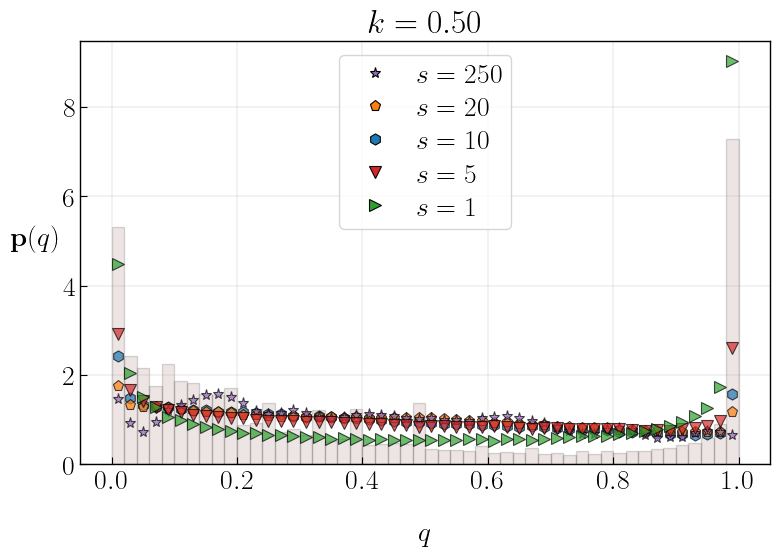

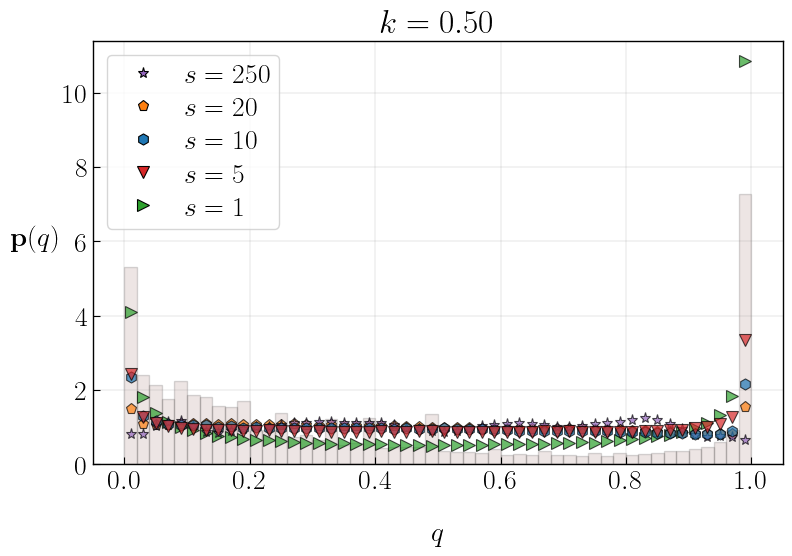

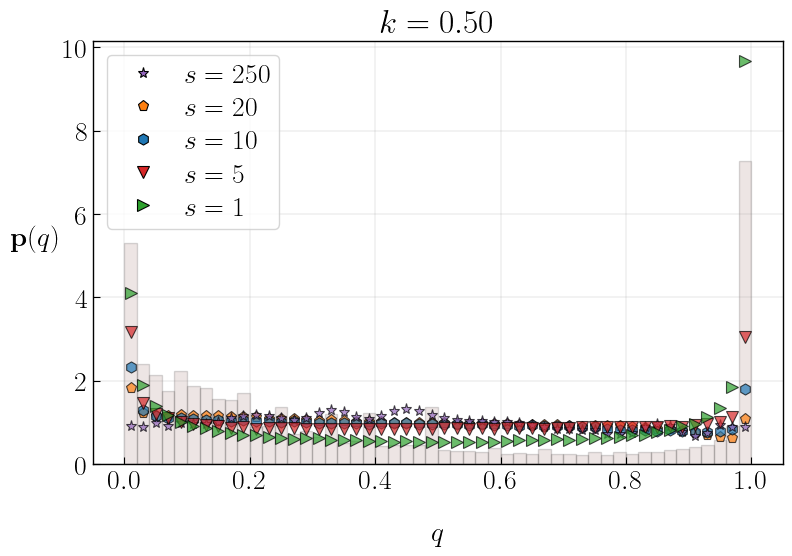

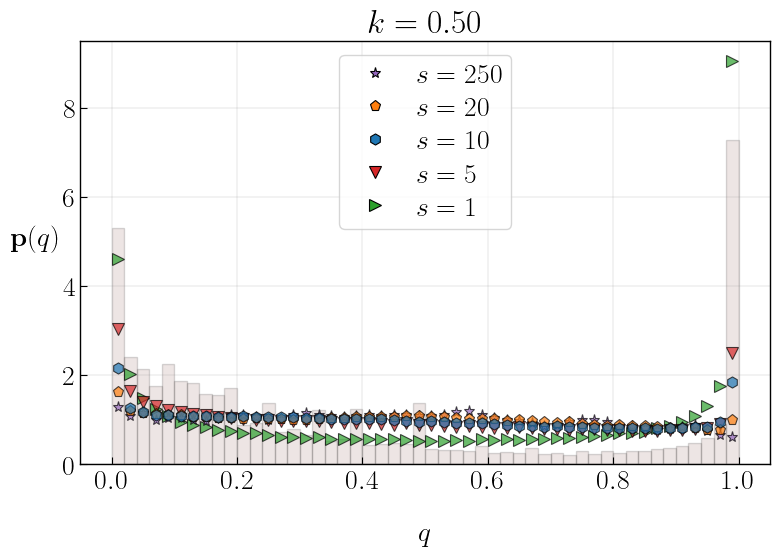

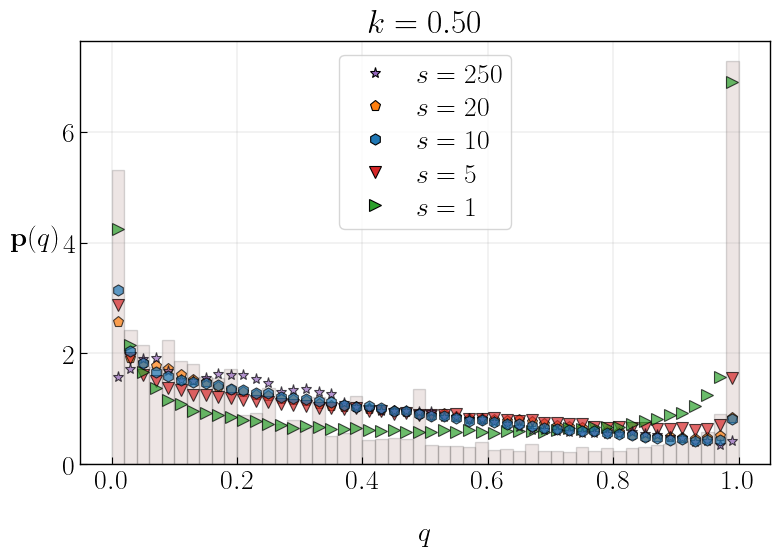

In [53]:
plots = [plt.subplots() for i in range(len(metadata_df['burstiness'].unique()))]
plots_dict = {v: plots[i] for i, v in enumerate(metadata_df['burstiness'].unique())}

nbins = 51

# Plot reference distribution for each subplot
for i in range(len(plots)): 
    ax = plots[i][1]
    ax.hist(sarafu['transactions']['frac_out'], bins=nbins-1, density=True, edgecolor='k', alpha=0.15, color='tab:brown')

data = sim_results
legend_dict = {b: [] for b in metadata_df['burstiness'].unique()}  # Store legend entries per burstiness value

for i in range(len(data)):
    s = data[i]['metadata']['s']
    b = data[i]['metadata']['burstiness']

    ax = plots_dict[b][1]
    fig = plots_dict[b][0]
    title = f"$k = {b:.2f}$"
    label = f'$s = {s:.0f}$'
    marker = markers_dict_s[s]
    color = colors_dict_s[s]

    h = histogram(data[i]['transactions']['frac_out'], log_bin=False, num_bins=nbins)

    ax.plot(h[0], h[1],
            linestyle='', marker=marker, color=color,
            alpha=0.7, label=label)

    # Collect legend entries for this subplot
    legend_dict[b].append((s, label, marker, color))

    ax.set_xlabel(r'$q$', rotation=0, labelpad=20)
    ax.set_ylabel(r'$\textbf{p}(q)$', rotation=0, labelpad=20)

# Sort and update legends for each subplot
for b, entries in legend_dict.items():
    fig = plots_dict[b][0]
    ax = plots_dict[b][1]  # Get subplot

    # Sort legend entries by s in descending order
    entries.sort(reverse=True, key=lambda x: x[0])

    # Extract sorted handles and labels
    sorted_labels = [entry[1] for entry in entries]
    sorted_markers = [entry[2] for entry in entries]
    sorted_colors = [entry[3] for entry in entries]

    # Manually create legend handles
    sorted_handles = [plt.Line2D([0], [0], marker=m, color=c, linestyle='', markersize=8) 
                      for m, c in zip(sorted_markers, sorted_colors)]

    # plt.rcParams.update({'axes.titlesize': 20})

    # Set legend only once per subplot
    ax.legend(sorted_handles, sorted_labels, loc='best')
    

    if put_title:
        ax.set_title(f"b = {b:.2f}")

    if save:
        # put_title = 0
        ax.set_title(None)
        fig.savefig(f'{fig_path}/frac_out_b{b}_s_var.png', bbox_inches='tight', pad_inches=0.1)
        print(f"Saved {fig_path}/frac_out_b{b}_s_var.png")
        # put_title = 1
        ax.set_title(title)

Saved /home/claudio/tesi/Template2/final_figures/mean_frac_out_s10_b_var.png
Saved /home/claudio/tesi/Template2/final_figures/mean_frac_out_s1_b_var.png
Saved /home/claudio/tesi/Template2/final_figures/mean_frac_out_s20_b_var.png
Saved /home/claudio/tesi/Template2/final_figures/mean_frac_out_s5_b_var.png
Saved /home/claudio/tesi/Template2/final_figures/mean_frac_out_s250_b_var.png


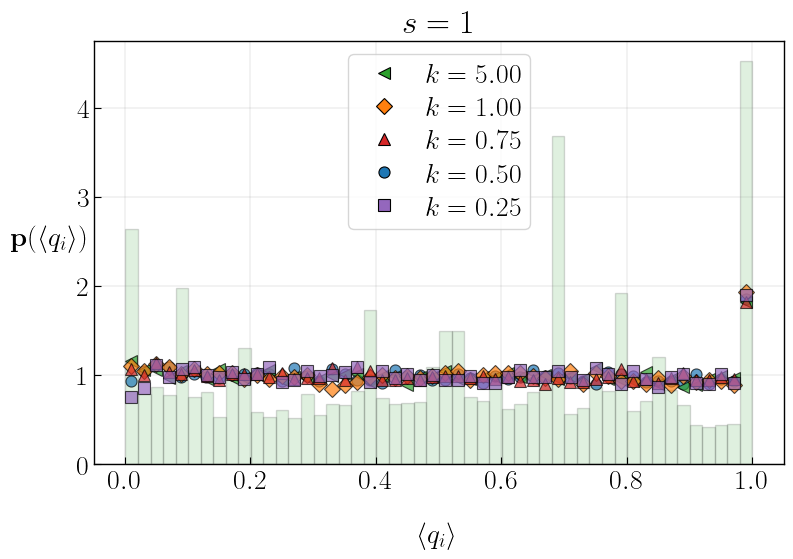

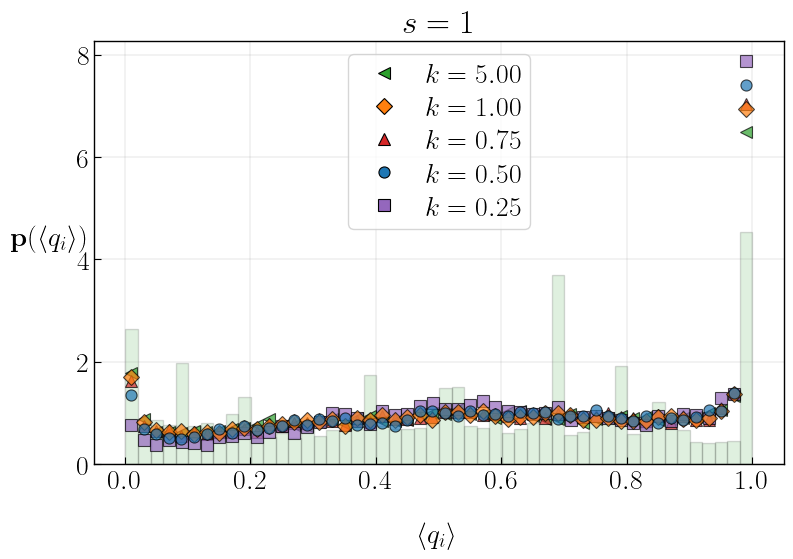

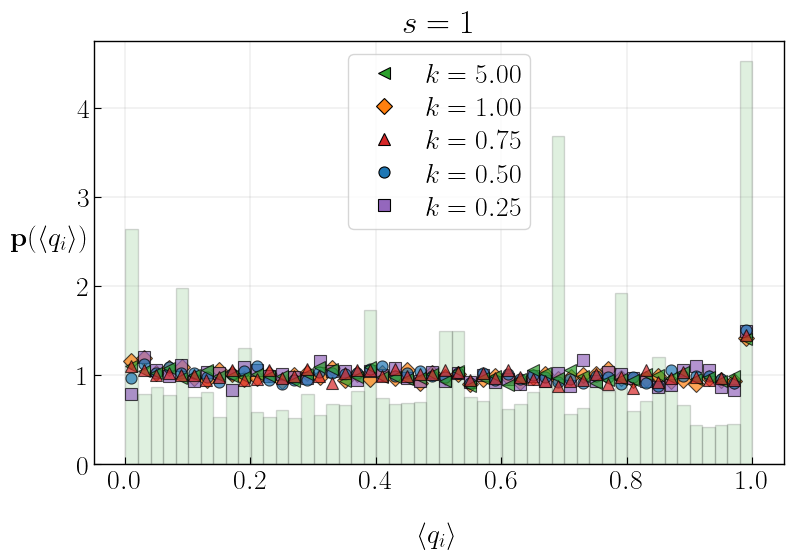

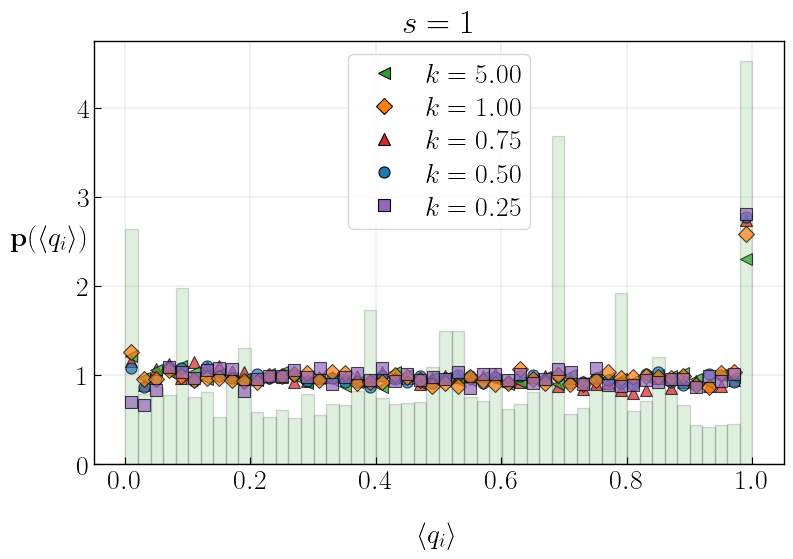

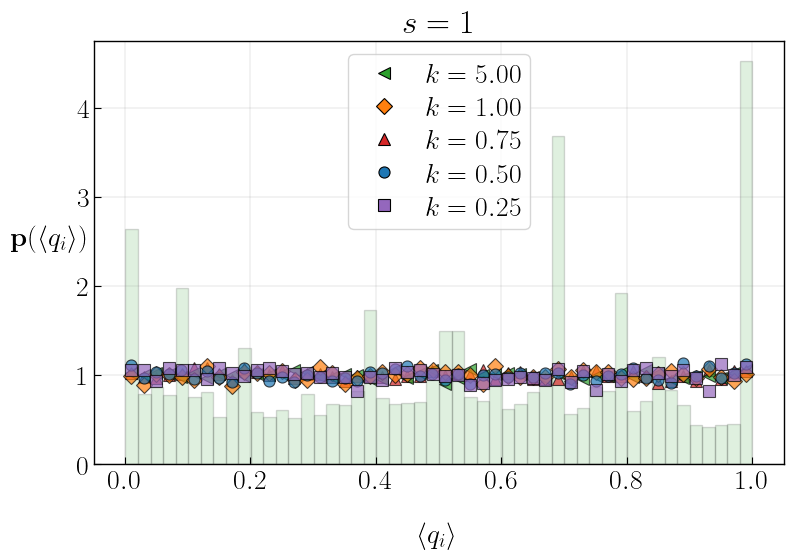

In [54]:
plots = [plt.subplots() for i in range(len(metadata_df['s'].unique()))]
plots_dict = {v: plots[i] for i, v in enumerate(metadata_df['s'].unique())}

nbins = 51

# Plot reference distribution for each subplot
for i in range(len(plots)): 
    ax = plots[i][1]
    ax.hist(sarafu['agents']['mean_frac_out'], bins=nbins-1, density=True, edgecolor='k', alpha=0.15, color='tab:green')

data = sim_results
legend_dict = {s: [] for s in metadata_df['s'].unique()}  # Store legend entries per s value

for i in range(len(data)):
    s = data[i]['metadata']['s']
    b = data[i]['metadata']['burstiness']

    ax = plots_dict[s][1]
    fig = plots_dict[s][0]
    title = f'$s={s}$'
    label = f"$k = {b:.2f}$"
    marker = markers_dict_b[b]
    color = colors_dict_b[b]

    h = histogram(data[i]['agents']['mean_frac_out'], log_bin=False, num_bins=nbins)

    ax.plot(h[0], h[1],
            linestyle='', marker=marker, color=color,
            alpha=0.7, label=label)

    # Collect legend entries for this subplot
    legend_dict[s].append((b, label, marker, color))

    ax.set_xlabel(r'$\langle q_i \rangle$', rotation=0, labelpad=20)
    ax.set_ylabel(r'$\textbf{p}(\langle q_i \rangle)$', rotation=0, labelpad=20)

# Sort and update legends for each subplot
for s, entries in legend_dict.items():
    fig = plots_dict[s][0]
    ax = plots_dict[s][1]  # Get subplot

    # Sort legend entries by b in descending order
    entries.sort(reverse=True, key=lambda x: x[0])

    # Extract sorted handles and labels
    sorted_labels = [entry[1] for entry in entries]
    sorted_markers = [entry[2] for entry in entries]
    sorted_colors = [entry[3] for entry in entries]

    # Manually create legend handles
    sorted_handles = [plt.Line2D([0], [0], marker=m, color=c, linestyle='', markersize=8) 
                      for m, c in zip(sorted_markers, sorted_colors)]

    # Set legend only once per subplot
    save=1
    ax.legend(sorted_handles, sorted_labels, loc='upper center')
    plt.rcParams.update({'legend.fontsize': 20})
    plt.rcParams.update({'lines.markersize': 8})
    plt.rcParams.update({'axes.labelsize': 20})

    # if put_title:
    #     ax.set_title(f"s={s}")

    if save:
        ax.set_title(None)
        fig.savefig(f'{fig_path}/mean_frac_out_s{s}_b_var.png', bbox_inches='tight', pad_inches=0.1)
        print(f"Saved {fig_path}/mean_frac_out_s{s}_b_var.png")
        ax.set_title(title)

In [41]:
save = 0

0.5
5.0
1.0
0.75
0.25


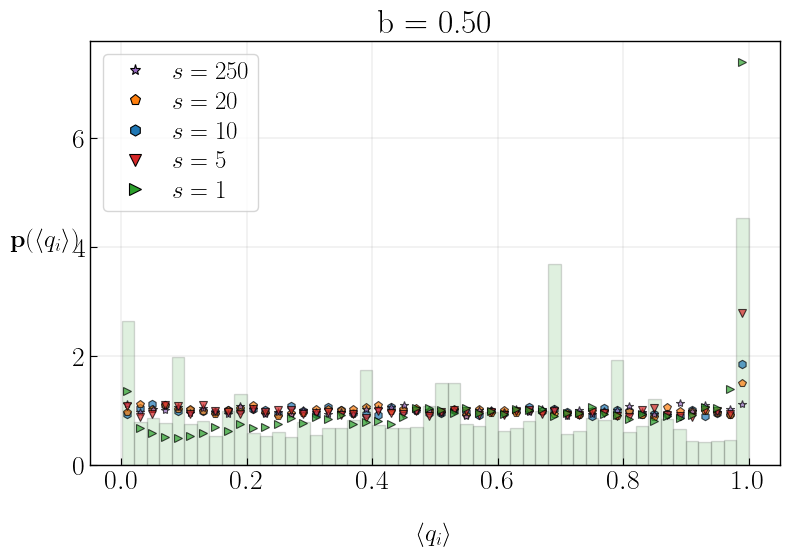

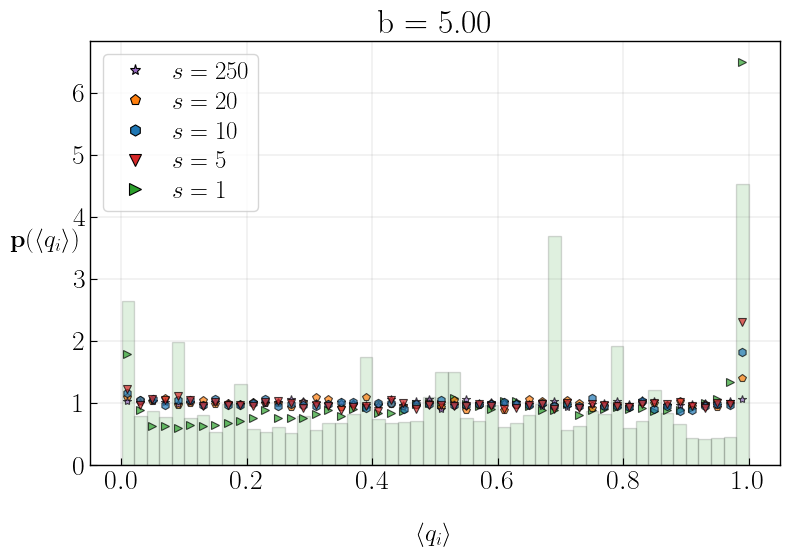

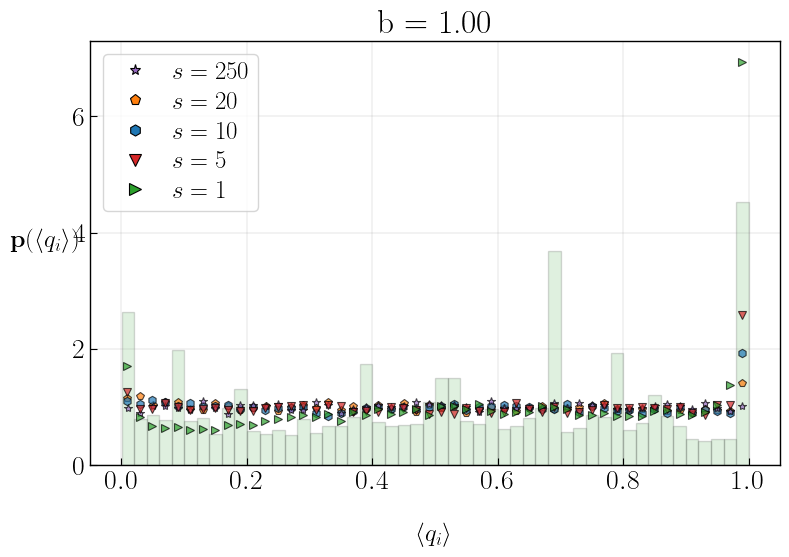

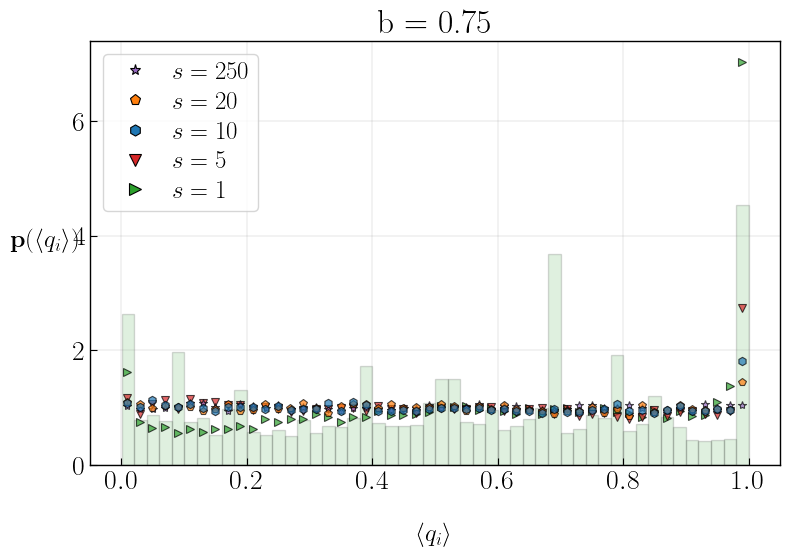

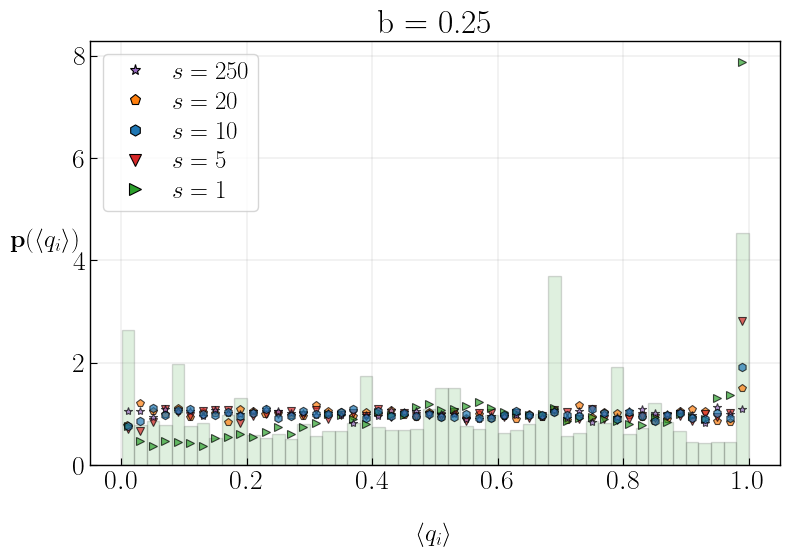

In [ ]:
import numpy as np

std_rc()

plots = [plt.subplots() for i in range(len(metadata_df['burstiness'].unique()))]
plots_dict = {v: plots[i] for i, v in enumerate(metadata_df['burstiness'].unique())}

nbins = 51

# Plot reference distribution for each subplot
for i in range(len(plots)): 
    ax = plots[i][1]
    ax.hist(sarafu['agents']['mean_frac_out'], bins=nbins-1, density=True, edgecolor='k', alpha=0.15, color='tab:green')

    # Add the uniform distribution line (p(x) = 1 in [0,1])
    x_uniform = np.linspace(0, 1, 100)
    y_uniform = np.ones_like(x_uniform)  # Constant density = 1
    # ax.plot(x_uniform, y_uniform, linestyle='--', color='black', label='Uniform(0,1)')

data = sim_results
legend_dict = {b: [] for b in metadata_df['burstiness'].unique()}  # Store legend entries per burstiness value

for i in range(len(data)):
    s = data[i]['metadata']['s']
    b = data[i]['metadata']['burstiness']

    ax = plots_dict[b][1]
    fig = plots_dict[b][0]
    title = f"$b = {b:.2f}$"
    label = f"$s = {s:.0f}$"
    marker = markers_dict_s[s]
    color = colors_dict_s[s]

    h = histogram(data[i]['agents']['mean_frac_out'], log_bin=False, num_bins=nbins)

    ax.plot(h[0], h[1],
            linestyle='', marker=marker, color=color,
            alpha=0.7, label=label)

    # Collect legend entries for this subplot
    legend_dict[b].append((s, label, marker, color))

    ax.set_xlabel(r'$\langle q_i \rangle$', rotation=0, labelpad=20)
    ax.set_ylabel(r'$\textbf{p}(\langle q_i \rangle)$', rotation=0, labelpad=20)

# Sort and update legends for each subplot
for b, entries in legend_dict.items():
    # print(b)
    fig = plots_dict[b][0]
    ax = plots_dict[b][1]  # Get subplot

    # Sort legend entries by s in descending order
    entries.sort(reverse=True, key=lambda x: x[0])

    # Extract sorted handles and labels
    sorted_labels = [entry[1] for entry in entries]
    sorted_markers = [entry[2] for entry in entries]
    sorted_colors = [entry[3] for entry in entries]

    # Manually create legend handles
    sorted_handles = [plt.Line2D([0], [0], marker=m, color=c, linestyle='', markersize=8) 
                      for m, c in zip(sorted_markers, sorted_colors)]

    # Set legend only once per subplot
    unif_bool = 0
    ax.legend(sorted_handles + [plt.Line2D([0], [0], linestyle='--', color='black')],
              sorted_labels + unif_bool*['Uniform(0,1)'], loc='best')

    if put_title:
        ax.set_title(f"b = {b:.2f}")

    if save:
        ax.set_title(None)
        fig.savefig(f'{fig_path}/mean_frac_out_b{b}_s_var.png', bbox_inches='tight', pad_inches=0.1)
        print(f"Saved {fig_path}/mean_frac_out_b{b}_s_var.png")
        ax.set_title(title)

In [33]:
sim_results_inf['metadata']

KeyError: 'metadata'

KeyError: 'metadata'

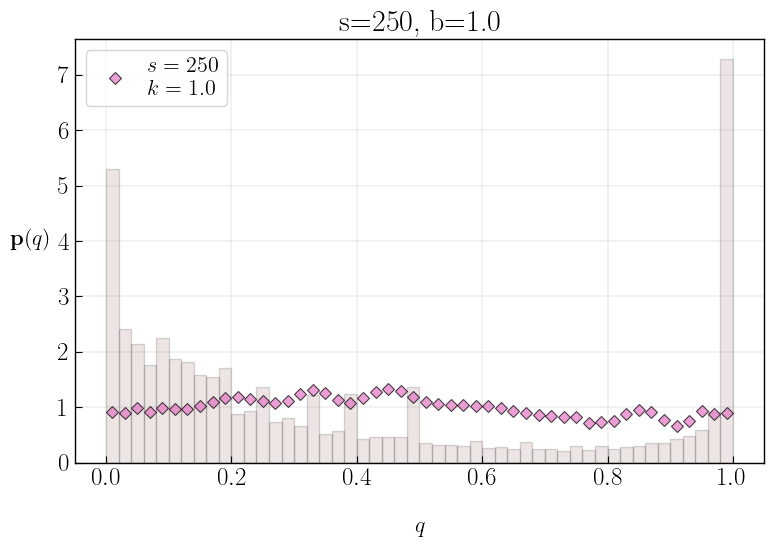

In [ ]:
# my_s = max(metadata_df['s'].unique())
my_s = 250
my_b = 1
col = 'frac_out'

fig, ax = plt.subplots()

nbins = 51

# Plot the reference histogram
ax.hist(sarafu['transactions'][col], bins=nbins-1, density=True, 
        edgecolor='k', alpha=0.15, color='tab:brown')


data = sim_results[find_key(my_b,my_s)]
s = data['metadata']['s']
b = data['metadata']['burstiness']

marker = markers_dict_b[b]
color = colors_dict_s[s]
# marker = 'h'
# color = 'k'
label = f'$s={s}$\n $k={b}$'

h = histogram(data['transactions'][col], log_bin=False, num_bins=nbins)

ax.plot(h[0], h[1],
        linestyle='', marker=marker, color=color,
        alpha=0.7, label=label)

ax.set_xlabel(r'$q$', rotation=0, labelpad=20)
ax.set_ylabel(r'$\textbf{p}(q)$', rotation=0, labelpad=20)
if put_title:
     ax.set_title(f's={s}, b={b}')
ax.legend()

# inf=1
# if inf:
#     data = sim_results_inf
#     s = data['metadata']['s']
#     b = data['metadata']['burstiness']

#     # marker = markers_dict_b[b]
#     # color = colors_dict_s[s]
#     marker = 'h'
#     color = 'k'
#     label = f'$s={s}$\n $k={b}$'

#     h = histogram(data['transactions'][col], log_bin=False, num_bins=nbins)

#     ax.plot(h[0], h[1],
#             linestyle='', marker=marker, color=color,
#             alpha=0.7, label=label)

#     ax.set_xlabel(r'$q$', rotation=0, labelpad=20)
#     ax.set_ylabel(r'$\textbf{p}(q)$', rotation=0, labelpad=20)


# save=0
if save:
    ax.set_title(None)
    fig.savefig(f'{fig_path}/single_figures/frac_out_s{s}_b{b}.png',bbox_inches='tight', pad_inches=0.1)
    print(f"Saved {fig_path}/single_figures/frac_out_s{s}_b{b}.png")
    ax.set_title(f'$s={s}$\n $k={b}$')

# for i in range(len(data)):
#     s = data[i]['metadata']['s']
#     b = data[i]['metadata']['burstiness']

#     # Filter for s=5000 and b=1
#     if s == my_s and b==my_b:
#         marker = markers_dict_b[b]
#         color = colors_dict_s[s]
#         # marker = 'h'
#         # color = 'k'
#         label = f'$s={s}$\n $k={b}$'

#         h = histogram(data[i]['transactions'][col], log_bin=False, num_bins=nbins)

#         ax.plot(h[0], h[1],
#                 linestyle='', marker=marker, color=color,
#                 alpha=0.7, label=label)

#         ax.set_xlabel(r'$q$', rotation=0, labelpad=20)
#         ax.set_ylabel(r'$\textbf{p}(q)$', rotation=0, labelpad=20)
#         # if put_title:
#         #      ax.set_title(f's={s}, b={b}')
#         ax.legend()
#         if save:
#             ax.set_title(None)
#             fig.savefig(f'{fig_path}/single_figures/frac_out_s{s}_b{b}.png',bbox_inches='tight', pad_inches=0.1)
#             print(f"Saved {fig_path}/single_figures/frac_out_s{s}_b{b}.png")
#             ax.set_title(f'$s={s}$\n $k={b}$')
# plt.show()






Saved /home/claudio/tesi/Template2/final_figures/single_figures/mean_frac_out_s1_b0.25.png


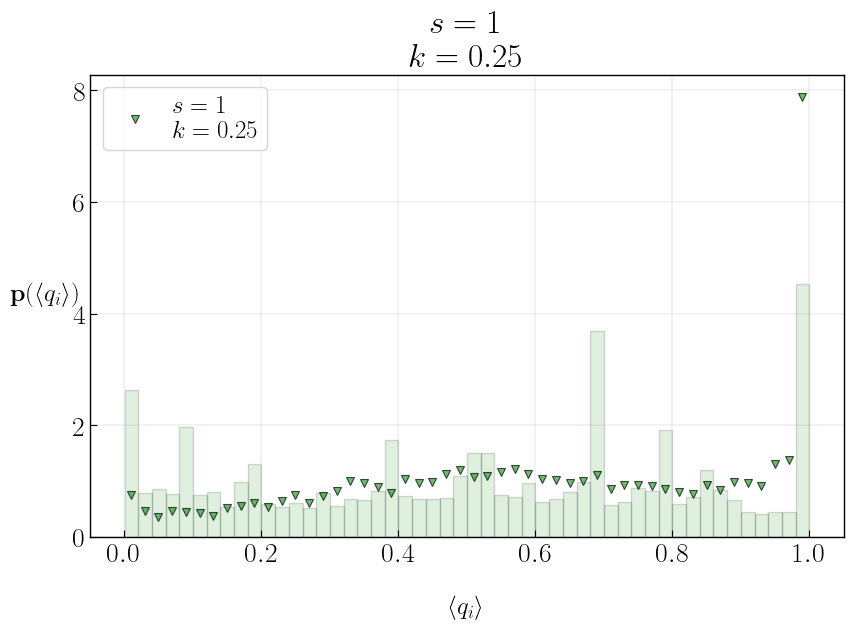

In [ ]:
# my_s = max(metadata_df['s'].unique())
my_s = 1
my_b = 0.25

fig, ax = plt.subplots()

nbins = 51

# Plot the reference histogram
ax.hist(sarafu['agents']['mean_frac_out'], bins=nbins-1, density=True, 
        edgecolor='k', alpha=0.15, color='tab:green')

data = sim_results

for i in range(len(data)):
    s = data[i]['metadata']['s']
    b = data[i]['metadata']['burstiness']

    # Filter for s=5000 and b=1
    if s == my_s and b==my_b:
        marker = markers_dict_b[b]
        color = colors_dict_s[s]
        # marker = 'h'
        # color = 'k'
        label = f'$s={s}$\n $k={b}$'

        h = histogram(data[i]['agents']['mean_frac_out'], log_bin=False, num_bins=nbins)

        ax.plot(h[0], h[1],
                linestyle='', marker=marker, color=color,
                alpha=0.7, label=label)

        ax.set_xlabel(r'$\langle q_i \rangle$', rotation=0, labelpad=20)
        ax.set_ylabel(r'$\textbf{p}(\langle q_i \rangle)$', rotation=0, labelpad=20)
        if put_title:
             ax.set_title(f's={s}, b={b}')
        ax.legend()
        if save:
            ax.set_title(None)
            fig.savefig(f'{fig_path}/single_figures/mean_frac_out_s{s}_b{b}.png',bbox_inches='tight', pad_inches=0.1)
            print(f"Saved {fig_path}/single_figures/mean_frac_out_s{s}_b{b}.png")
            ax.set_title(f'$s={s}$\n $k={b}$')
plt.show()






In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plots = [plt.subplots() for i in range(len(metadata_df['s'].unique()))]
plots_dict = {v: plots[i] for i, v in enumerate(metadata_df['s'].unique())}

nbins = 51
logbin = 1

# Reference histograms (SARAFU data)
h1 = histogram(sarafu['transactions']['weight'], num_bins=21, log_bin=logbin)
h3 = histogram(sarafu['balance_pivot'].iloc[:, -1].values, num_bins=21, log_bin=logbin)

# fb = sarafu['balance_pivot'].iloc[:, -1].values 
# fb = fb[fb>=1]

# h3 = histogram(fb, num_bins=21, log_bin=logbin)

for i in range(len(plots)):
    ax = plots[i][1]
    ax.plot(h1[0], h1[1], c='tab:cyan', ls='-.', alpha=0.7)
    ax.plot(h3[0], h3[1], c='tab:orange', ls='-.', alpha=0.7)

data = sim_results
legend_dict = {s: [] for s in metadata_df['s'].unique()}  # Store legend entries per `s`

for i in range(len(data)):
    s = data[i]['metadata']['s']
    b = data[i]['metadata']['burstiness']

    ax = plots_dict[s][1]
    fig = plots_dict[s][0]
    title = f'$s = {s:.0f}$'
    label = f"$k = {b:.2f}$"
    marker = markers_dict_b[b]

    h2 = histogram(data[i]['transactions']['weight'], num_bins=21, log_bin=logbin)
    h4 = histogram(data[i]['balance_pivot'].iloc[:, -1].values, num_bins=21, log_bin=logbin)

    ax.plot(h2[0], h2[1], 
            marker=marker, 
            color='tab:cyan', 
            alpha=0.7,
            ls='',
            label=label)  # Label only for legend sorting

    ax.plot(h4[0], h4[1],
            marker=marker, 
            color='tab:orange',
            alpha=0.7,
            ls='')

    # Store legend entries for sorting
    legend_dict[s].append((b, label, marker))

    if logbin:
        ax.loglog()

    ax.set_xlabel(r'$\bf{x}$', rotation=0, labelpad=20)
    ax.set_ylabel(r'$\textbf{p}(\bf{x})$', rotation=0, labelpad=20)

# Sort and update legends for each subplot
for s, entries in legend_dict.items():
    fig = plots_dict[s][0]
    ax = plots_dict[s][1]  # Get subplot

    # Sort legend entries by b in descending order
    entries.sort(reverse=True, key=lambda x: x[0])

    # Extract sorted handles and labels
    sorted_labels = [entry[1] for entry in entries]
    sorted_markers = [entry[2] for entry in entries]

    # Manually create legend handles (white markers for `b`)
    sorted_handles = [plt.Line2D([0], [0], marker=m, color='white', markeredgecolor='black', linestyle='', markersize=8) 
                      for m in sorted_markers]

    # Create custom SARAFU legend entry with colored labels
    sarafu_handle = plt.Line2D([0], [0], color='black', linestyle='-', linewidth=1.5)
    sarafu_weight = plt.Line2D([0], [0], color='tab:cyan', linestyle='', label="Weight")
    sarafu_balance = plt.Line2D([0], [0], color='tab:orange', linestyle='', label="Balance")

    # Append SARAFU reference to legend
    sorted_handles += [sarafu_handle, sarafu_weight, sarafu_balance]
    sorted_labels += ["SARAFU", "Weight", "Balance"]

    # Set legend with custom label colors
    leg = ax.legend(sorted_handles, sorted_labels, loc='best', handletextpad=2)
    
    # Change legend text colors for SARAFU entries
    leg.get_texts()[-2].set_color('tab:cyan')   # Weight in cyan
    leg.get_texts()[-1].set_color('tab:orange') # Balance in orange

    # if put_title:
    #     ax.set_title(f"s = {s:.0f}")

    if save:
        ax.set_title(None)
        fig.savefig(f'{fig_path}/bal_and_weight_s{s}_b_var.png', bbox_inches='tight', pad_inches=0.1)
        print(f'Figure saved: {fig_path}/bal_and_weight_s{s}_b_var.png')
        ax.set_title(f's = {s:.0f}')


Figure saved: /home/claudio/tesi/Template2/final_figures/bal_and_weight_s10_b_var.png
Figure saved: /home/claudio/tesi/Template2/final_figures/bal_and_weight_s1_b_var.png


: 

Saved /home/claudio/tesi/Template2/final_figures/bal_and_weight_b0.5_s_var.png
Saved /home/claudio/tesi/Template2/final_figures/bal_and_weight_b5.0_s_var.png
Saved /home/claudio/tesi/Template2/final_figures/bal_and_weight_b1.0_s_var.png
Saved /home/claudio/tesi/Template2/final_figures/bal_and_weight_b0.75_s_var.png
Saved /home/claudio/tesi/Template2/final_figures/bal_and_weight_b0.25_s_var.png


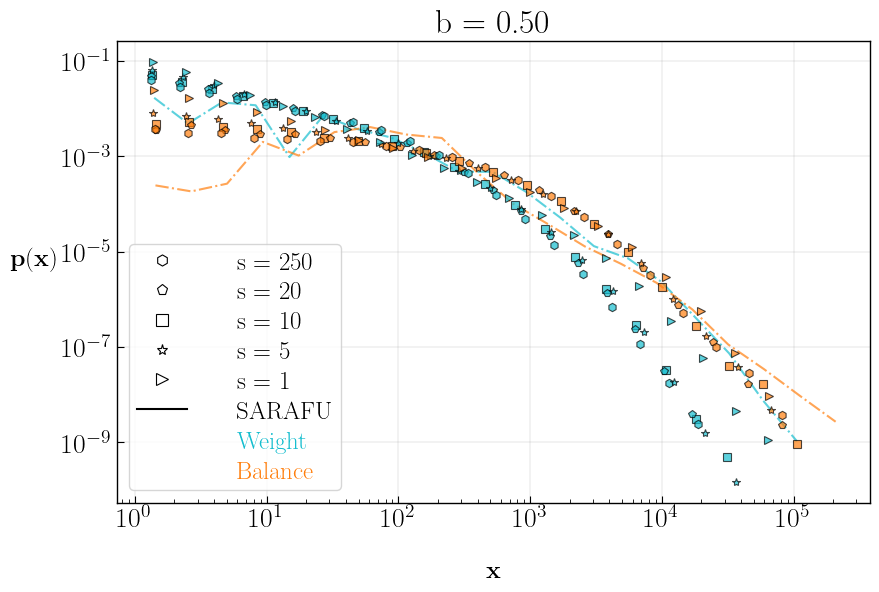

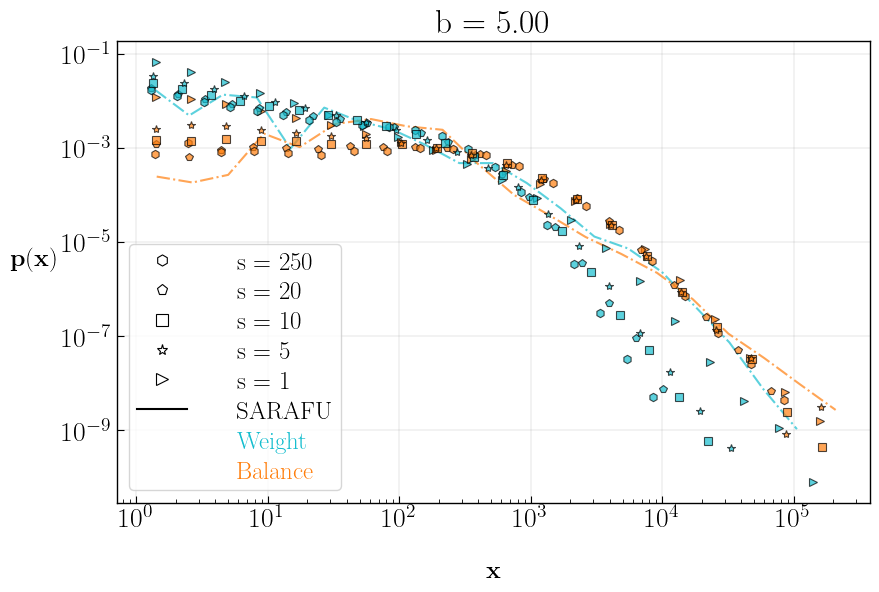

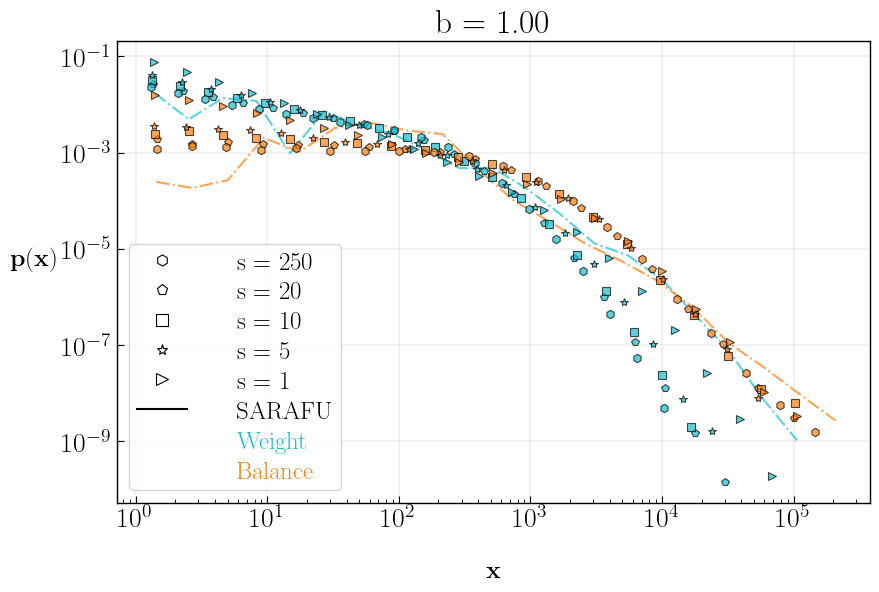

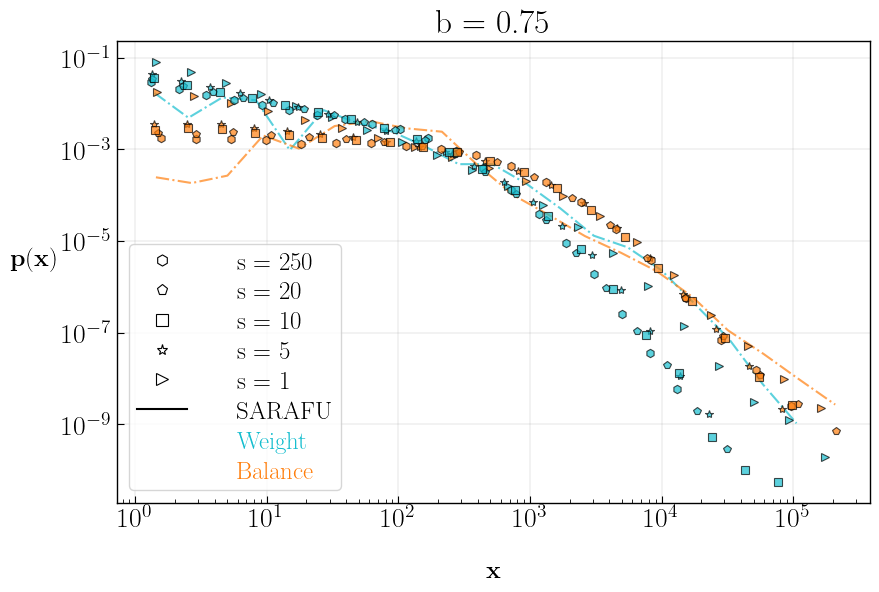

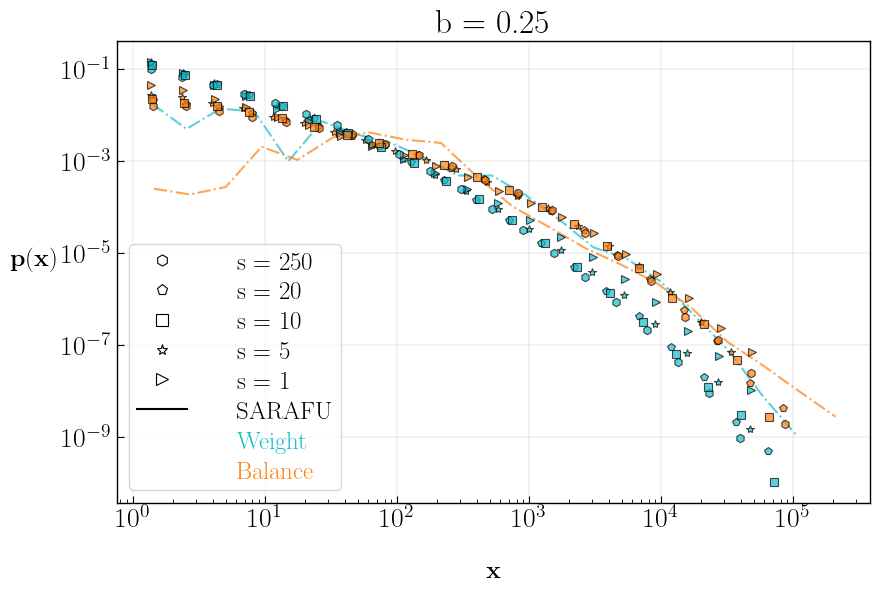

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plots = [plt.subplots() for i in range(len(metadata_df['burstiness'].unique()))]
plots_dict = {v: plots[i] for i, v in enumerate(metadata_df['burstiness'].unique())}

nbins = 51
logbin = 1

# Reference histograms (SARAFU data)
h1 = histogram(sarafu['transactions']['weight'], num_bins=21, log_bin=logbin)
h3 = histogram(sarafu['balance_pivot'].iloc[:, -1].values, num_bins=21, log_bin=logbin)

for i in range(len(plots)):
    ax = plots[i][1]
    ax.plot(h1[0], h1[1], c='tab:cyan', ls='-.', alpha=0.7)
    ax.plot(h3[0], h3[1], c='tab:orange', ls='-.', alpha=0.7)

data = sim_results
legend_dict = {b: [] for b in metadata_df['burstiness'].unique()}  # Store legend entries per `b`

for i in range(len(data)):
    s = data[i]['metadata']['s']
    b = data[i]['metadata']['burstiness']

    ax = plots_dict[b][1]
    fig = plots_dict[b][0]
    title = f"$k = {b:.2f}$"
    label = f'$s = {s:.0f}$'
    marker = markers_dict_s[s]

    h2 = histogram(data[i]['transactions']['weight'], num_bins=21, log_bin=logbin)
    h4 = histogram(data[i]['balance_pivot'].iloc[:, -1].values, num_bins=21, log_bin=logbin)

    ax.plot(h2[0], h2[1], 
            marker=marker, 
            color='tab:cyan', 
            alpha=0.7,
            ls='',
            label=label)  # Label only for legend sorting

    ax.plot(h4[0], h4[1],
            marker=marker, 
            color='tab:orange',
            alpha=0.7,
            ls='')

    # Store legend entries for sorting
    legend_dict[b].append((s, label, marker))

    if logbin:
        ax.loglog()

    ax.set_xlabel(r'$\bf{x}$', rotation=0, labelpad=20)
    ax.set_ylabel(r'$\textbf{p}(\bf{x})$', rotation=0, labelpad=20)

# Sort and update legends for each subplot
for b, entries in legend_dict.items():

    title = f"$k = {b:.2f}$"


    fig = plots_dict[b][0]
    ax = plots_dict[b][1]  # Get subplot

    # Sort legend entries by s in descending order
    entries.sort(reverse=True, key=lambda x: x[0])

    # Extract sorted handles and labels
    sorted_labels = [entry[1] for entry in entries]
    sorted_markers = [entry[2] for entry in entries]

    # Manually create legend handles (white markers for `s`)
    sorted_handles = [plt.Line2D([0], [0], marker=m, color='white', markeredgecolor='black', linestyle='', markersize=8) 
                      for m in sorted_markers]

    # Create custom SARAFU legend entry with colored labels
    sarafu_handle = plt.Line2D([0], [0], color='black', linestyle='-', linewidth=1.5)
    sarafu_weight = plt.Line2D([0], [0], color='tab:cyan', linestyle='', label="Weight")
    sarafu_balance = plt.Line2D([0], [0], color='tab:orange', linestyle='', label="Balance")

    # Append SARAFU reference to legend
    sorted_handles += [sarafu_handle, sarafu_weight, sarafu_balance]
    sorted_labels += ["SARAFU", "Weight", "Balance"]

    # Set legend with custom label colors
    leg = ax.legend(sorted_handles, sorted_labels, loc='best', handletextpad=2)
    
    # Change legend text colors for SARAFU entries
    leg.get_texts()[-2].set_color('tab:cyan')   # Weight in cyan
    leg.get_texts()[-1].set_color('tab:orange') # Balance in orange

    if put_title:
        ax.set_title(f"$k = {b:.2f}$")

    if save:
        ax.set_title(None)
        fig.savefig(f'{fig_path}/bal_and_weight_b{b}_s_var.png', bbox_inches='tight', pad_inches=0.1)
        print(f"Saved {fig_path}/bal_and_weight_b{b}_s_var.png")
        ax.set_title(title)


In [39]:
save = 1

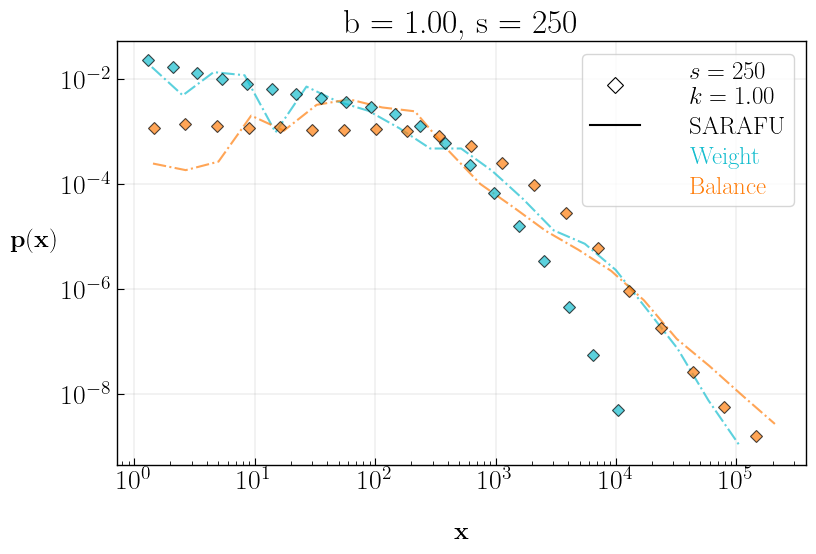

In [42]:
import matplotlib.pyplot as plt

# my_s = max(metadata_df['s'].unique())
my_s = 250
my_b = 1

fig, ax = plt.subplots()

nbins = 51
logbin = 1

# Reference histograms (SARAFU data)
h1 = histogram(sarafu['transactions']['weight'], num_bins=21, log_bin=logbin)
h3 = histogram(sarafu['balance_pivot'].iloc[:, -1].values, num_bins=21, log_bin=logbin)
ax.plot(h1[0], h1[1], c='tab:cyan', ls='-.', alpha=0.7)
ax.plot(h3[0], h3[1], c='tab:orange', ls='-.', alpha=0.7)

# Get specific data key
da_key = find_key(b=my_b, s=my_s)
data = sim_results[da_key]

s = data['metadata']['s']
b = data['metadata']['burstiness']

title = f"b = {b:.2f}, s = {s:.0f}"
marker = markers_dict_b[b] 
marker = marker if marker != '*' else 'H'

# Simulated data histograms
h2 = histogram(data['transactions']['weight'], num_bins=21, log_bin=logbin)
h4 = histogram(data['balance_pivot'].iloc[:, -1].values, num_bins=21, log_bin=logbin)

ax.plot(h2[0], h2[1], 
        marker=marker, 
        color='tab:cyan', 
        alpha=0.7,
        ls='')

ax.plot(h4[0], h4[1],
        marker=marker, 
        color='tab:orange',
        alpha=0.7,
        ls='')

if logbin:
    ax.loglog()

ax.set_xlabel(r'$\bf{x}$', rotation=0, labelpad=20)
ax.set_ylabel(r'$\textbf{p}(\bf{x})$', rotation=0, labelpad=20)

# Create legend entries
simulated_handle = plt.Line2D([0], [0], marker=marker, color='white', markeredgecolor='black', linestyle='', markersize=8)
sarafu_handle = plt.Line2D([0], [0], color='black', linestyle='-', linewidth=1.5)
sarafu_weight = plt.Line2D([0], [0], color='tab:cyan', linestyle='', label="Weight")
sarafu_balance = plt.Line2D([0], [0], color='tab:orange', linestyle='', label="Balance")

# # Build legend
handles = [simulated_handle, sarafu_handle, sarafu_weight, sarafu_balance]
labels = [f"$s = {s}$\n$k={b:.2f}$", "SARAFU", "Weight", "Balance"]
# Build legend
# handles = [ sarafu_weight, sarafu_balance]
# labels = [ "Weight", "Balance"]

leg = ax.legend(handles, labels, loc='best', handletextpad=2)

# Set SARAFU label colors
leg.get_texts()[-2].set_color('tab:cyan')  # Weight in cyan
leg.get_texts()[-1].set_color('tab:orange')  # Balance in orange

# if put_title:
#     ax.set_title(title)

if save:
    ax.set_title(None)
    fig.savefig(f'{fig_path}/single_figures/bal_and_weight_b{b}_s{s}.png', bbox_inches='tight', pad_inches=0.1)
    ax.set_title(title)


In [33]:
save = 1

pearson,0.95
kendall,0.55
spearman,0.69


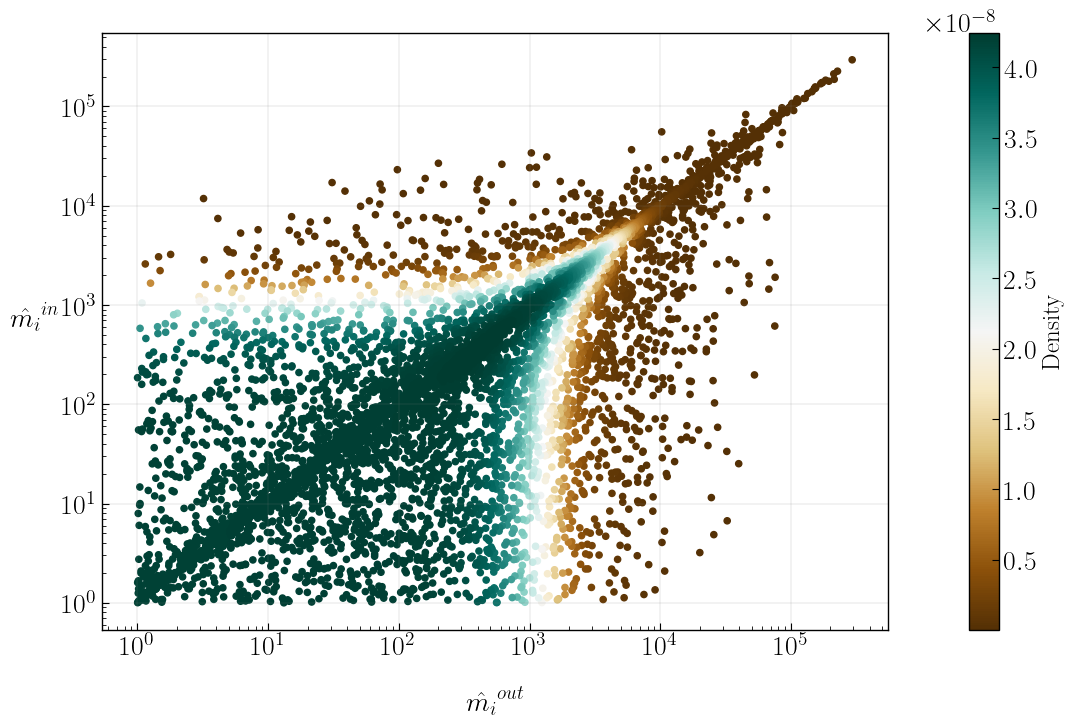

In [ ]:
da_key = find_key(0.25,1)

fig, ax = plt.subplots(constrained_layout=True)  # Usare constrained_layout migliora la gestione dello spazio
plt.subplots_adjust(bottom=0.2,left=0.2) 

data = sim_results[da_key]['agents'][['vol_out','vol_in']]
s,b = sim_results[da_key]['metadata']['s'],sim_results[da_key]['metadata']['burstiness']


xlabel = r'$\hat{m_i}^{out}$'
ylabel = r'$\hat{m_i}^{in}$'

plt.subplots_adjust(bottom=0.2,left=0.2)  # Evita il taglio delle label in basso

plot_scatter_kde(data.values,ax,s=20,cmap = 'BrBG')
plt.loglog()
plt.xlabel(xlabel,rotation = 0,labelpad=20,fontsize=22)
plt.ylabel(ylabel,rotation = 0,labelpad=20,fontsize=22)
set_size(1.5*B,B,ax)


for method in ['pearson','kendall','spearman']:
    print(f'{method},{data.corr(method=method).values[0,1]:.2f}')

if save:
    fig.savefig(f'{fig_path}/volinvolout_corr_simu_s{s}_b{b}.png',bbox_inches='tight', pad_inches=0.1)




pearson,0.94
kendall,0.49
spearman,0.63


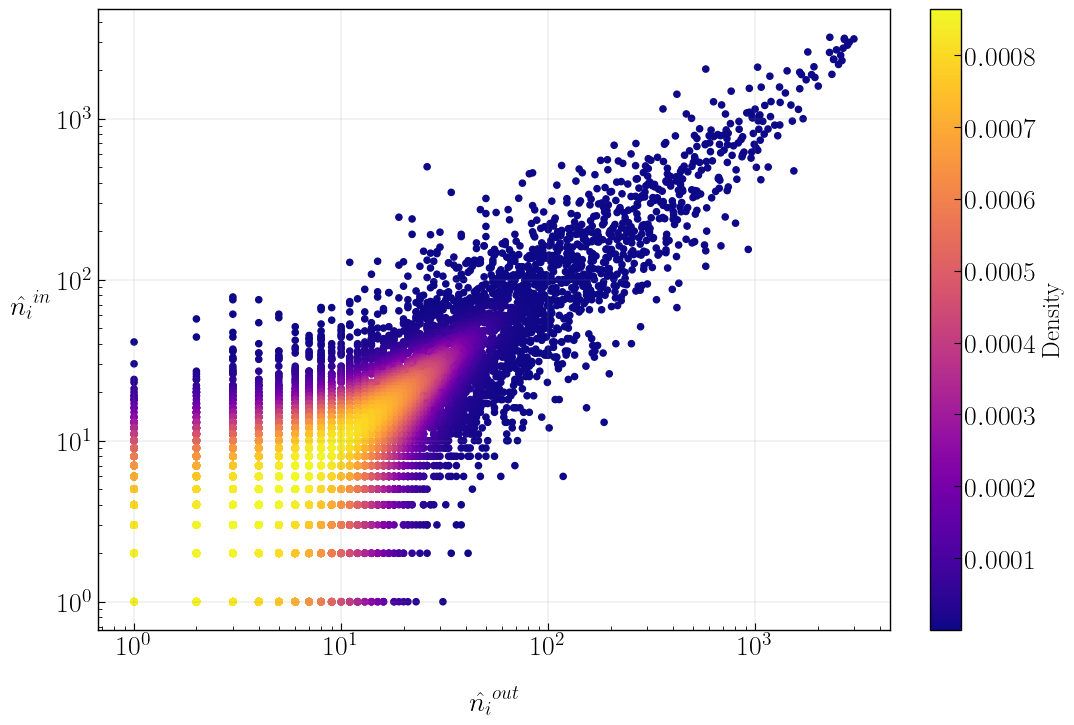

In [38]:
da_key = find_key(1,250)

fig, ax = plt.subplots(constrained_layout=True)  # Usare constrained_layout migliora la gestione dello spazio
plt.subplots_adjust(bottom=0.2,left=0.2) 

data = sim_results[da_key]['agents'][['tx_out','tx_in']]
s,b = sim_results[da_key]['metadata']['s'],sim_results[da_key]['metadata']['burstiness']


xlabel = r'$\hat{n_i}^{out}$'
ylabel = r'$\hat{n_i}^{in}$'

plt.subplots_adjust(bottom=0.2,left=0.2)  # Evita il taglio delle label in basso

plot_scatter_kde(data.values,ax,s=20)
plt.loglog()
plt.xlabel(xlabel,rotation = 0,labelpad=20,fontsize=20)
plt.ylabel(ylabel,rotation = 0,labelpad=20,fontsize=20)
set_size(1.5*B,B,ax)


for method in ['pearson','kendall','spearman']:
    print(f'{method},{data.corr(method=method).values[0,1]:.2f}')

if save:
    fig.savefig(f'{fig_path}/txintxout_corr_simu_s{s}_b{b}.png',bbox_inches='tight', pad_inches=0.1)




pearson,0.98
kendall,0.61
spearman,0.75


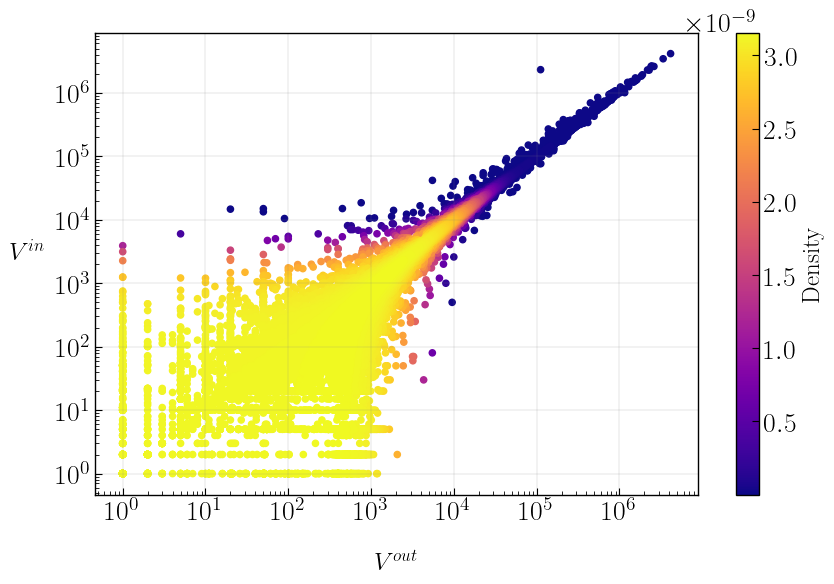

In [ ]:


fig = plt.figure()

data = sarafu['agents'][['vol_out','vol_in']]

xlabel = r'$V^{out}$'
ylabel = r'$V^{in}$'


plot_scatter_kde(data.values,plt.gca(),s=20)
plt.xlabel(xlabel,rotation=0,labelpad=20);
plt.ylabel(ylabel,rotation=0,labelpad=20)
# plt.legend([f'b = {b:.2f}\ns = {s:.0f}'])
plt.loglog()

for method in ['pearson','kendall','spearman']:
    print(f'{method},{data.corr(method=method).values[0,1]:.2f}')
save = 0
if save:
    fig.savefig(f'{fig_path}/volinvolout_corr_simu_s{s}_b{b}.png',bbox_inches='tight', pad_inches=0.1)
save = 1


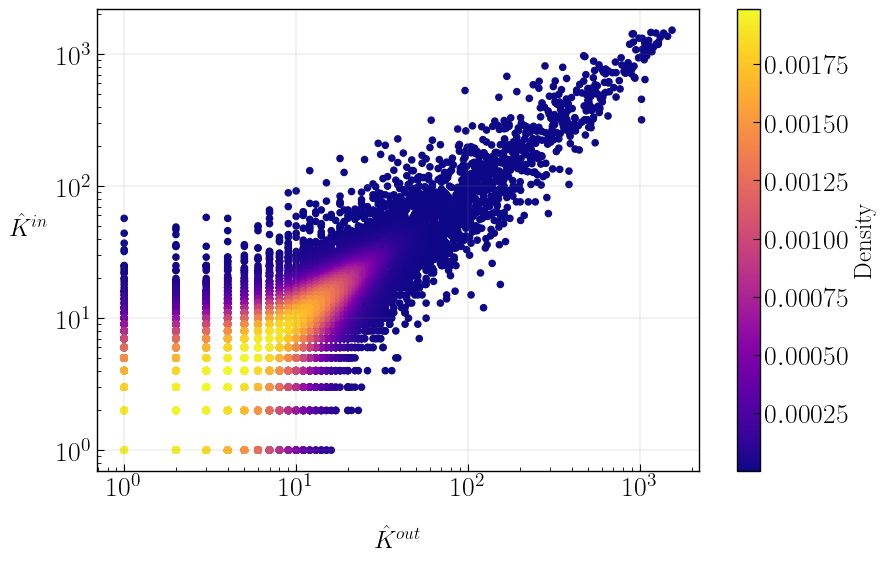

In [ ]:
da_key = find_key(1,5)

fig = plt.figure()

data = sim_results[da_key]['agents'][['out_deg','in_deg']]
s,b = sim_results[da_key]['metadata']['s'],sim_results[da_key]['metadata']['burstiness']


xlabel = r'$\hat{K}^{out}$'
ylabel = r'$\hat{K}^{in}$'


plot_scatter_kde(data.values,plt.gca(),s=20)
plt.xlabel(xlabel,rotation=0,labelpad=20);
plt.ylabel(ylabel,rotation=0,labelpad=20)
plt.loglog()


if save:
    fig.savefig(f'{fig_path}/degindegout_corr_simu_s{s}_b{b}.png',bbox_inches='tight', pad_inches=0.1)



In [6]:
import json

# Load results from JSON file
with open("/home/claudio/tesi/sarafu/final_analysis/betabinomial_without_activation.json", "r") as f:
    results = json.load(f)

# Now `results` is a Python dictionary
print(type(results))  # Should print <class 'dict'>


<class 'dict'>


In [8]:
results.keys()

dict_keys(['0', '1', '2', '3', '4'])

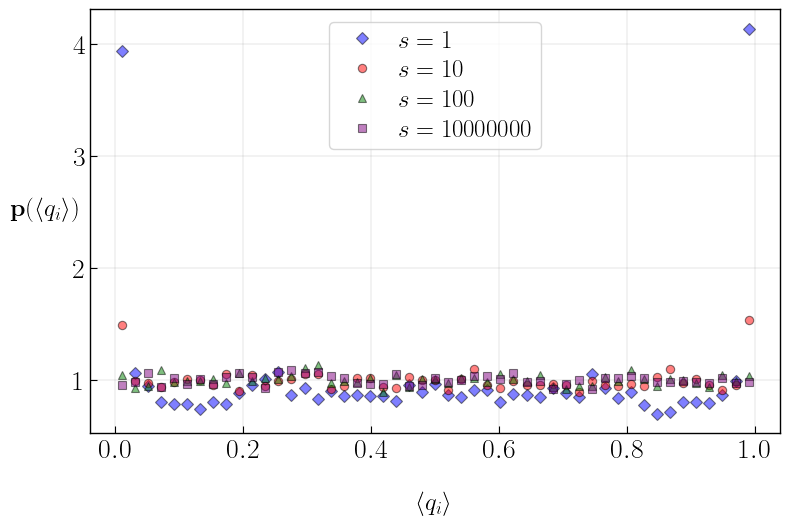

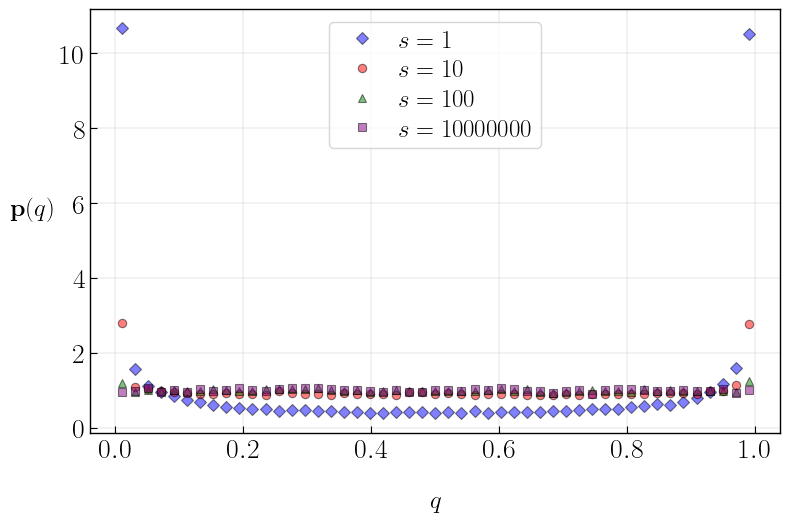

In [18]:

# Define colors and markers
colors = ["blue", "red", "green", "purple", "orange"]
markers = ['D', 'o', '^', 's', 'v']

# Extract xi_means and all_xis
xi_means_dict = {}
all_xis_dict = {}

for idx in results.keys():
    # print(idx)
    s = results[idx]["s"]
    if s == 0.1:  # Skip this iteration if s is 0.1
        continue
    xi_means = [agent["mean"] for agent in results[idx]["agents"].values()]
    all_xis = [xi for agent in results[idx]["agents"].values() for xi in agent["xis"]]
    xi_means_dict[s] = xi_means
    all_xis_dict[s] = all_xis

# Plot `xi_means` distribution
fig1 = plt.figure()
for (s, color, marker) in zip(xi_means_dict.keys(), colors, markers):
    h = histogram(xi_means_dict[s], num_bins=50, density=True, log_bin=False)
    plt.plot(h[0], h[1], alpha=0.5, color=color, marker=marker,
             linestyle='', label=rf"$s={s}$", markeredgecolor="black")

plt.xlabel(r"$\langle q_i \rangle$",rotation = 0,labelpad=20)
plt.ylabel(r"$\textbf{p}(\langle q_i \rangle)$",rotation = 0,labelpad=20)
# plt.title(r"Distribution of Mean $q_i$ over agents")
plt.legend()
plt.show()

fig1.savefig(f'{fig_path}/mean_xi_no_acitivty.png',bbox_inches='tight', pad_inches=0.1)

# Plot `all_xis` distribution
fig2=plt.figure()
for (s, color, marker) in zip(all_xis_dict.keys(), colors, markers):
    h = histogram(all_xis_dict[s], num_bins=50, density=True, log_bin=False)
    plt.plot(h[0], h[1], alpha=0.5, color=color, marker=marker,
             linestyle='', label=rf"$s={s}$", markeredgecolor="black")

plt.xlabel(r"$q$",rotation = 0,labelpad=20)
plt.ylabel(r"$\textbf{p}(q)$",rotation = 0,labelpad=20)
# plt.title(r"Distribution of All $q_i$")
plt.legend()
plt.show()

fig2.savefig(f'{fig_path}/xi_no_acitivty.png',bbox_inches='tight', pad_inches=0.1)


In [ ]:
metadata_df

sprate_type sprate_params inbal_type inbal_params activity_type  \
0      uniform        (0, 1)   constant      (1000,)        powlaw   
1      uniform        (0, 1)   constant      (1000,)        powlaw   
2      uniform        (0, 1)   constant      (1000,)        powlaw   
3      uniform        (0, 1)   constant      (1000,)        powlaw   
4      uniform        (0, 1)   constant      (1000,)        powlaw   
6      uniform        (0, 1)   constant      (1000,)        powlaw   
8      uniform        (0, 1)   constant      (1000,)        powlaw   
9      uniform        (0, 1)   constant      (1000,)        powlaw   
11     uniform        (0, 1)   constant      (1000,)        powlaw   
12     uniform        (0, 1)   constant      (1000,)        powlaw   
13     uniform        (0, 1)   constant      (1000,)        powlaw   
14     uniform        (0, 1)   constant      (1000,)        powlaw   
17     uniform        (0, 1)   constant      (1000,)        powlaw   
18     uniform        (0, 1)   constant      (1000,)        powlaw   
20     uniform        (0, 1)   constant      (1000,)        powlaw   
21     uniform        (0, 1)   constant      (1000,)        powlaw   
22     uniform        (0, 1)   constant      (1000,)        powlaw   
23     uniform        (0, 1)   constant      (1000,)        powlaw   
24     uniform        (0, 1)   constant      (1000,)        powlaw   
26     uniform        (0, 1)   constant      (1000,)        powlaw   
27     uniform        (0, 1)   constant      (1000,)        powlaw   
30     uniform        (0, 1)   constant      (1000,)        powlaw   
31     uniform        (0, 1)   constant      (1000,)        powlaw   
32     uniform        (0, 1)   constant      (1000,)        powlaw   
34     uniform        (0, 1)   constant      (1000,)        powlaw   

    activity_params attractivity_type attractivity_params      N        T  \
0   (1.85, 1, 1838)            powlaw     (1.87, 1, 2118)  25000  3000000   
1   (1.85, 1, 1838)            powlaw     (1.87, 1, 2118)  25000  3000000   
2   (1.85, 1, 1838)            powlaw     (1.87, 1, 2118)  25000  3000000   
3   (1.85, 1, 1838)            powlaw     (1.87, 1, 2118)  25000  3000000   
4   (1.85, 1, 1838)            powlaw     (1.87, 1, 2118)  25000  3000000   
6   (1.85, 1, 1838)            powlaw     (1.87, 1, 2118)  25000  3000000   
8   (1.85, 1, 1838)            powlaw     (1.87, 1, 2118)  25000  3000000   
9   (1.85, 1, 1838)            powlaw     (1.87, 1, 2118)  25000  3000000   
11  (1.85, 1, 1838)            powlaw     (1.87, 1, 2118)  25000  3000000   
12  (1.85, 1, 1838)            powlaw     (1.87, 1, 2118)  25000  3000000   
13  (1.85, 1, 1838)            powlaw     (1.87, 1, 2118)  25000  3000000   
14  (1.85, 1, 1838)            powlaw     (1.87, 1, 2118)  25000  3000000   
17  (1.85, 1, 1838)            powlaw     (1.87, 1, 2118)  25000  3000000   
18  (1.85, 1, 1838)            powlaw     (1.87, 1, 2118)  25000  3000000   
20  (1.85, 1, 1838)            powlaw     (1.87, 1, 2118)  25000  3000000   
21  (1.85, 1, 1838)            powlaw     (1.87, 1, 2118)  25000  3000000   
22  (1.85, 1, 1838)            powlaw     (1.87, 1, 2118)  25000  3000000   
23  (1.85, 1, 1838)            powlaw     (1.87, 1, 2118)  25000  3000000   
24  (1.85, 1, 1838)            powlaw     (1.87, 1, 2118)  25000  3000000   
26  (1.85, 1, 1838)            powlaw     (1.87, 1, 2118)  25000  3000000   
27  (1.85, 1, 1838)            powlaw     (1.87, 1, 2118)  25000  3000000   
30  (1.85, 1, 1838)            powlaw     (1.87, 1, 2118)  25000  3000000   
31  (1.85, 1, 1838)            powlaw     (1.87, 1, 2118)  25000  3000000   
32  (1.85, 1, 1838)            powlaw     (1.87, 1, 2118)  25000  3000000   
34  (1.85, 1, 1838)            powlaw     (1.87, 1, 2118)  25000  3000000   

          D    s  decimals  SIZE_SCALE  LENGTH_SCALE  MEAN_IET  burstiness  \
0   0.06864   10         3           1             6  43706315        0.50   
1   0.06864    1       

pearson,0.93
kendall,0.54
spearman,0.72


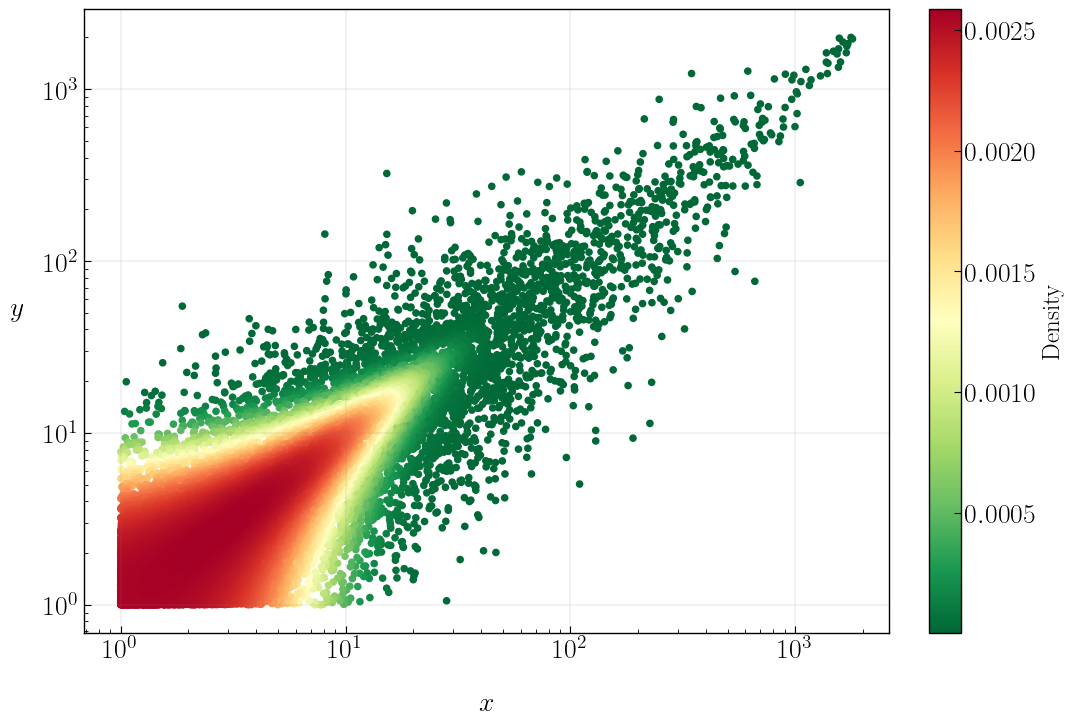

In [40]:
nodes = pd.read_csv('/home/claudio/tesi/sarafu/final_simulations/008/nodes_33.csv')

data = nodes[['act_pot','att_pot']]

fig, ax = plt.subplots(constrained_layout=True)  # Usare constrained_layout migliora la gestione dello spazio
plt.subplots_adjust(bottom=0.2,left=0.2)  
xlabel = r'$x$'
ylabel = r'$y$'


plot_scatter_kde(data.values,ax,s=20,cmap = 'RdYlGn_r')
plt.xlabel(xlabel,rotation=0,labelpad=20,fontsize = 22)
plt.ylabel(ylabel,rotation=0,labelpad=20,fontsize=22)
# plt.legend([f'b = {b:.2f}\ns = {s:.0f}'])
plt.loglog()
plt.xlabel(xlabel,rotation = 0,labelpad=20,fontsize=20)
plt.ylabel(ylabel,rotation = 0,labelpad=20,fontsize=20)
set_size(1.5*B,B,ax)
for method in ['pearson','kendall','spearman']:
    print(f'{method},{data.corr(method=method).values[0,1]:.2f}')

if save:
    fig.savefig(f'{fig_path}/synth_actattr_corr.png',bbox_inches='tight', pad_inches=0.1)



[]

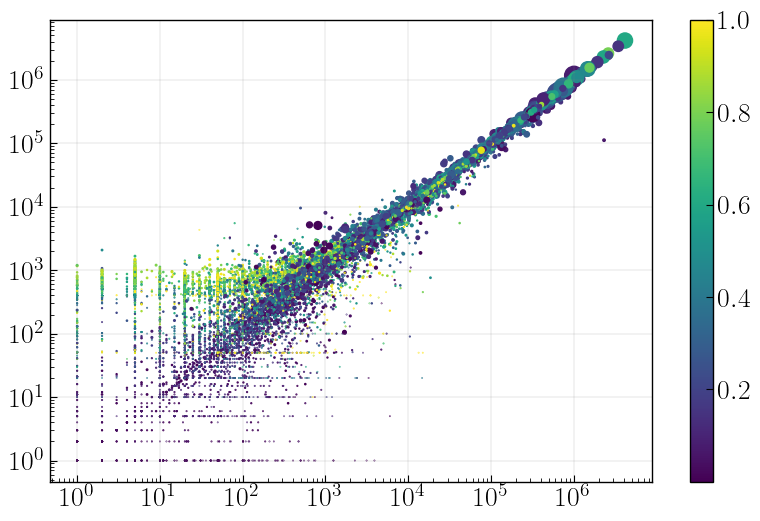

In [49]:
data = sarafu['agents']

plt.scatter(data['vol_in'],data['vol_out'],c= data['mean_frac_out'],s=0.1*data['tx_out'])
# plt.scatter(data['vol_in'],data['vol_out'],s=5* data['mean_frac_out'],c=100*data['tx_out'])

plt.colorbar()
plt.loglog()

clayton [0.21000901] 453.4720267646168
gumbel [1.] -1.0095035918313469e-10
frank [0.06708984] 1.3985995821525954
joe [1.] 9946.798561959557
galambos [0.00069554] 0.0
fgm [0.02838587] 1.1835816496291756
plackett [1.03760272] 1.538706148692384
rgumbel [1.07302075] 210.26429723865408
rclayton [1.00000026e-06] -0.00429619955935057
rjoe [1.] 10207.503983931038
rgalambos [4.02857586e-05] 0.0
BB1 [0.21001581 1.        ] 453.47202611074175
 message: Inequality constraints incompatible
 success: False
  status: 4
     fun: nan
       x: [ 1.000e+00  1.000e+00]
     nit: 1
     jac: [       nan        nan]
    nfev: 3
    njev: 1
optimization failed
Error fitting BB2: cannot unpack non-iterable NoneType object
Best copula: rjoe, Parameter: [1.], Score: 10207.503983931038


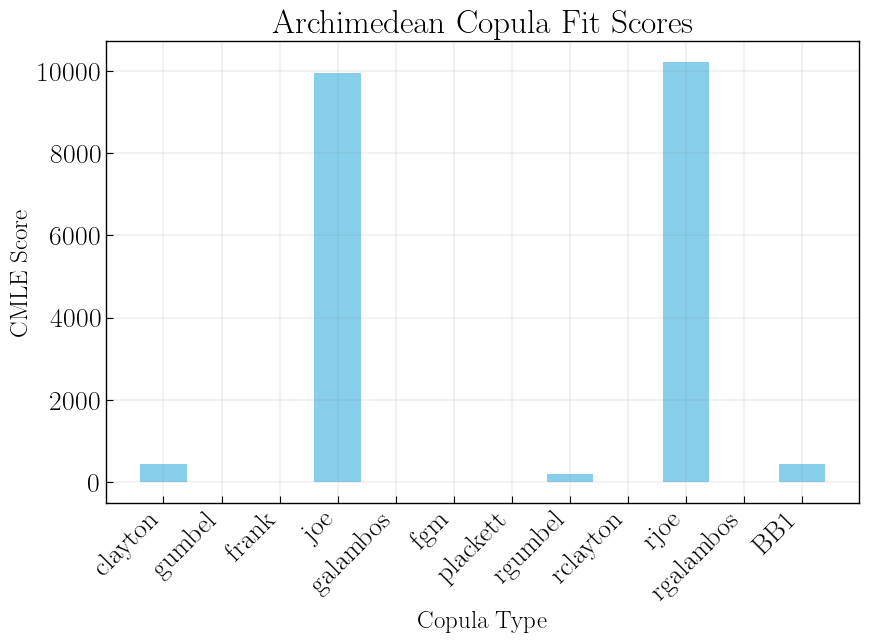

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from pycop import estimation, archimedean

# Assuming 'agents' DataFrame exists
# data = agents[['activity', 'attractiveness']]
data = sarafu['agents'][['tx_out','tx_in']]
data = data.rank(pct=True).T.values

max_score = 0
cmles = []
copula_types = []
fitted_params = []

for copula_type in archimedean.Archimedean_families:
    try:
        cop = archimedean(copula_type)
        param, cmle = estimation.fit_cmle(cop, data)
        cmles.append(cmle)
        copula_types.append(copula_type)
        fitted_params.append(param)
                
        if cmle >= max_score:
            max_score = cmle
            winner = copula_type
            winner_param = param
        
        print(copula_type, param, cmle)
    except Exception as e:
        print(f"Error fitting {copula_type}: {e}")
        pass

    with open('sarafu_info.txt','a') as f:
        print(f'Best copula: {winner}, Parameter: {winner_param}, Score: {max_score}',file=f)

print(f'Best copula: {winner}, Parameter: {winner_param}, Score: {max_score}')

# Plot CMLE scores
fig = plt.figure()
plt.bar(copula_types, cmles, color='skyblue')
plt.xlabel('Copula Type')
plt.ylabel('CMLE Score')
plt.title('Archimedean Copula Fit Scores')
plt.xticks(rotation=45, ha='right')
plt.show()


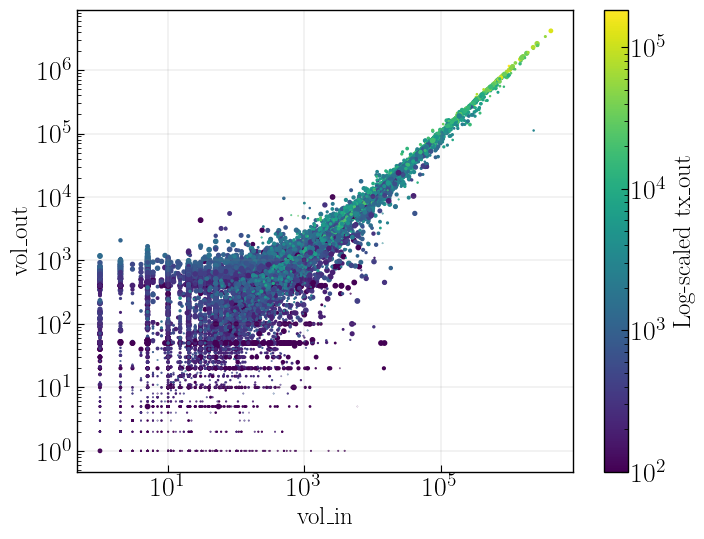

In [50]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

data = sarafu['agents']

plt.figure(figsize=(8,6))
sc = plt.scatter(
    data['vol_in'], 
    data['vol_out'], 
    s=10 * data['mean_frac_out'], 
    c=100 * data['tx_out'], 
    norm=mcolors.LogNorm(),  # Normalizzazione logaritmica
    cmap='viridis'
)

cbar = plt.colorbar(sc)
cbar.set_label('Log-scaled tx_out')

plt.xscale('log')
plt.yscale('log')

plt.xlabel('vol_in')
plt.ylabel('vol_out')

plt.show()


[]

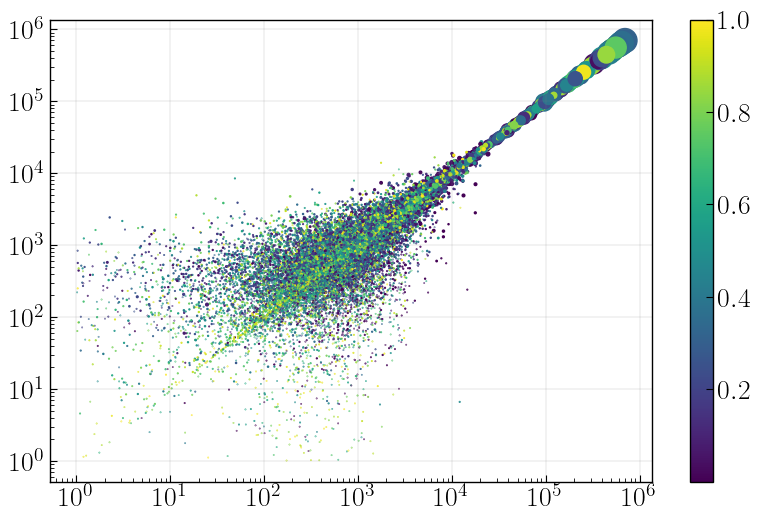

In [19]:
data = sim_results[find_key(1,250)]['agents']

plt.scatter(data['vol_in'],data['vol_out'],c= data['mean_frac_out'],s=0.1*data['tx_out'])
plt.colorbar()
plt.loglog()

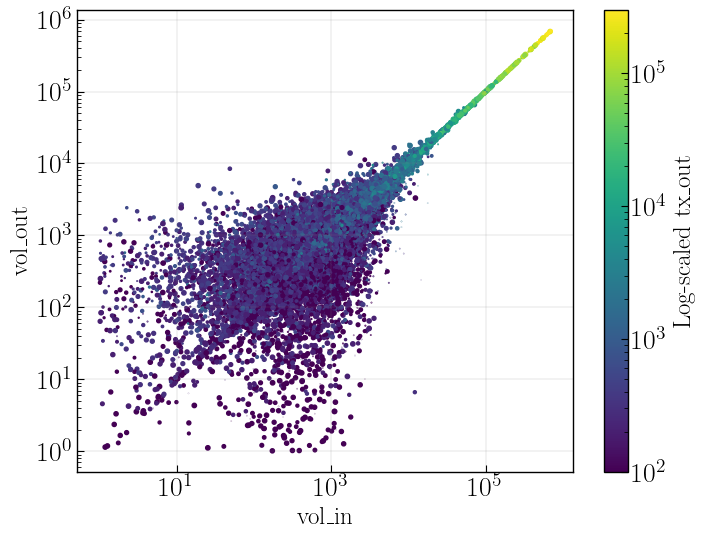

In [51]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

data = sim_results[find_key(1,250)]['agents']

plt.figure(figsize=(8,6))
sc = plt.scatter(
    data['vol_in'], 
    data['vol_out'], 
    s=10 * data['mean_frac_out'], 
    c=100 * data['tx_out'], 
    norm=mcolors.LogNorm(),  # Normalizzazione logaritmica
    cmap='viridis'
)

cbar = plt.colorbar(sc)
cbar.set_label('Log-scaled tx_out')

plt.xscale('log')
plt.yscale('log')

plt.xlabel('vol_in')
plt.ylabel('vol_out')

plt.show()


[]

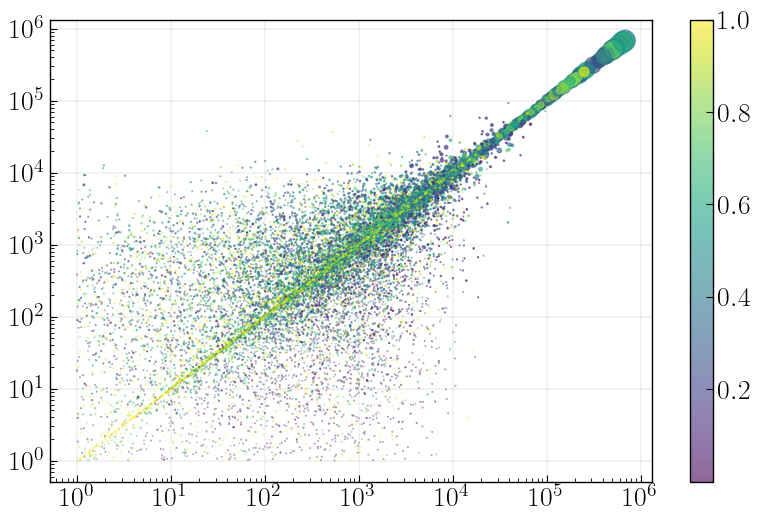

In [56]:
data = sim_results[find_key(1,1)]['agents']

plt.scatter(data['vol_in'],data['vol_out'],c= data['mean_frac_out'],s=0.1*data['tx_out'],alpha=0.6)

plt.colorbar()
plt.loglog()

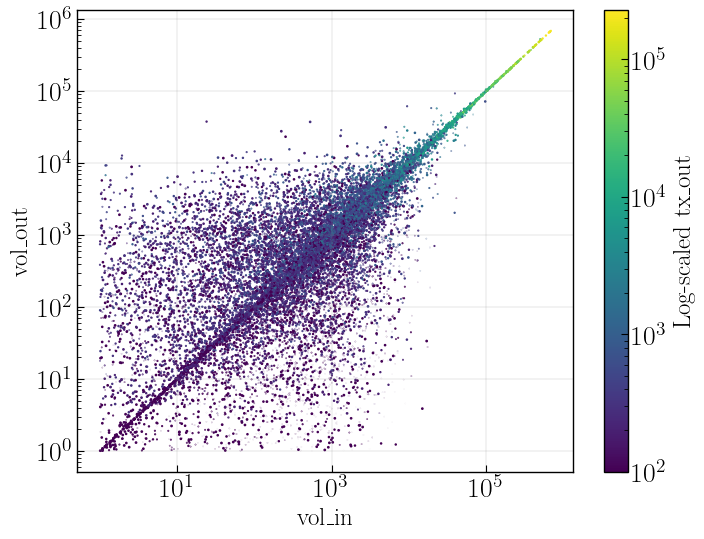

In [55]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

data = sim_results[find_key(1,1)]['agents']

plt.figure(figsize=(8,6))
sc = plt.scatter(
    data['vol_in'], 
    data['vol_out'], 
    s=1 * data['mean_frac_out'], 
    c=100 * data['tx_out'], 
    norm=mcolors.LogNorm(),  # Normalizzazione logaritmica
    cmap='viridis'
)

cbar = plt.colorbar(sc)
cbar.set_label('Log-scaled tx_out')

plt.xscale('log')
plt.yscale('log')

plt.xlabel('vol_in')
plt.ylabel('vol_out')

plt.show()


[]

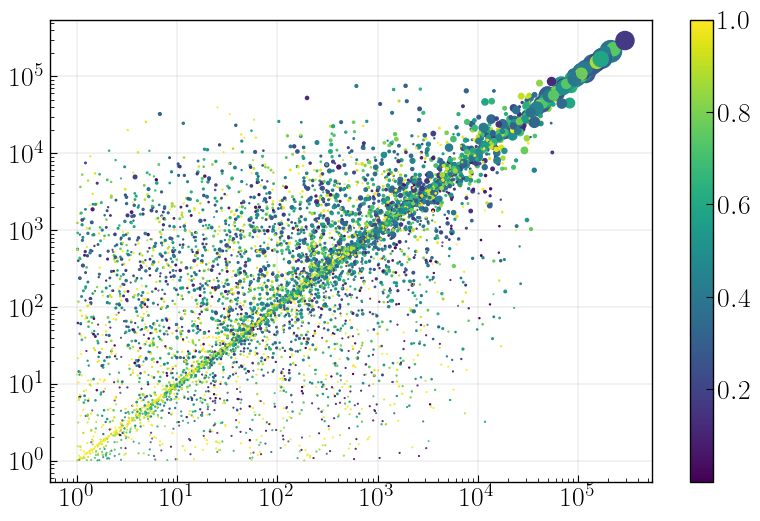

In [54]:
data = sim_results[find_key(0.25,1)]['agents']

plt.scatter(data['vol_in'],data['vol_out'],c= data['mean_frac_out'],s=0.25*data['tx_out'])
plt.colorbar()
plt.loglog()

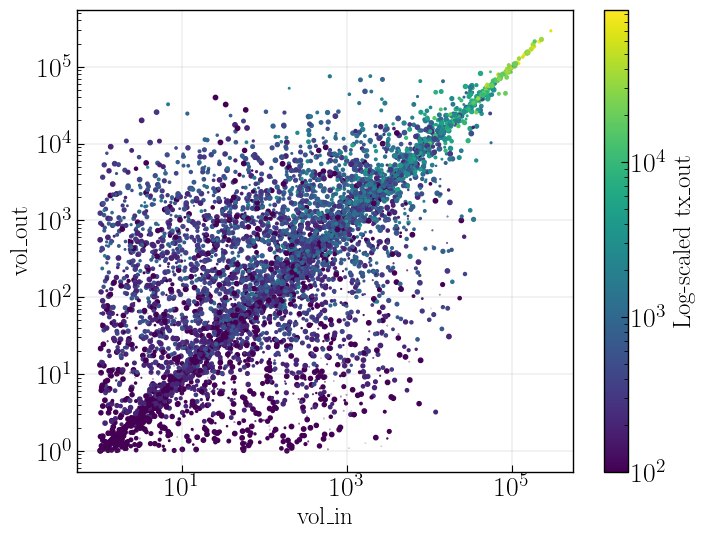

In [53]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

data = sim_results[find_key(0.25,1)]['agents']

plt.figure(figsize=(8,6))
sc = plt.scatter(
    data['vol_in'], 
    data['vol_out'], 
    s=10 * data['mean_frac_out'], 
    c=100 * data['tx_out'], 
    norm=mcolors.LogNorm(),  # Normalizzazione logaritmica
    cmap='viridis'
)

cbar = plt.colorbar(sc)
cbar.set_label('Log-scaled tx_out')

plt.xscale('log')
plt.yscale('log')

plt.xlabel('vol_in')
plt.ylabel('vol_out')

plt.show()


In [22]:
sarafu.keys()

dict_keys(['transactions', 'agents', 'balances', 'filtered_balances', 'balance_pivot'])

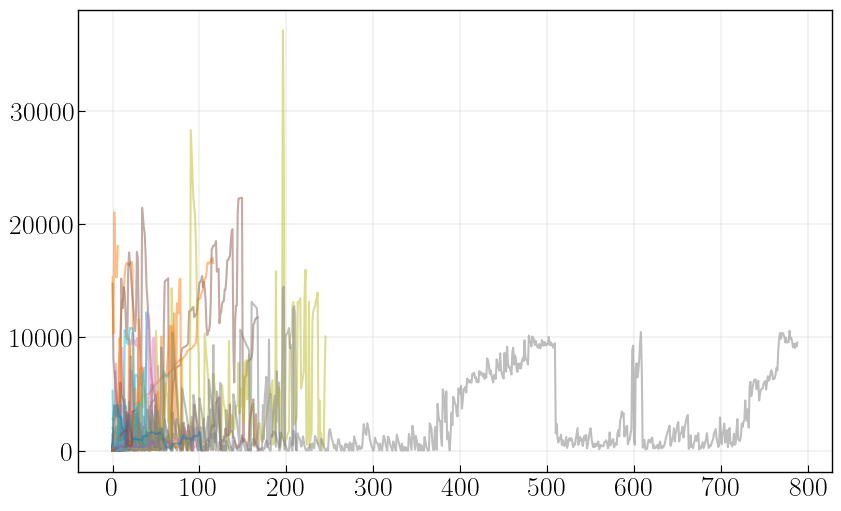

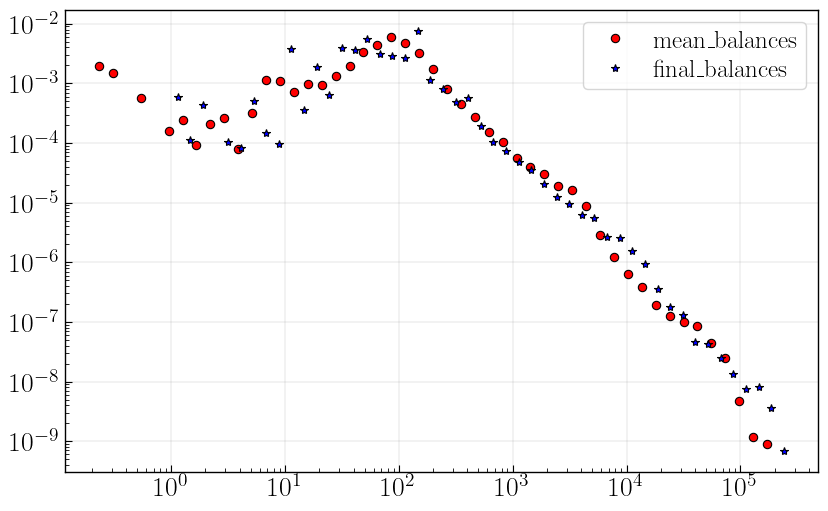

<Figure size 972x600 with 0 Axes>

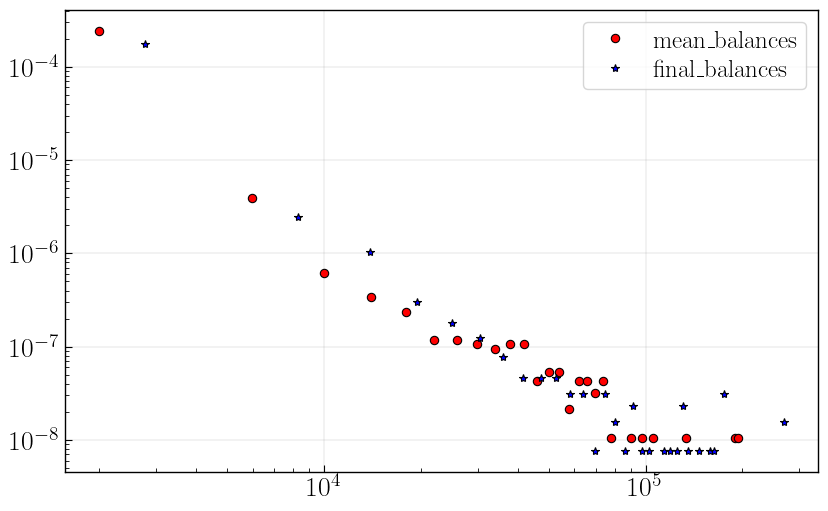

In [22]:
data = sarafu['filtered_balances']

mean_balances = []
for idx, user in data.groupby('crid'):
    if np.random.random()<0.01:
        plt.plot(user.balance.values,alpha=0.5)
    mean_balances.append(user.balance.mean())

h = histogram(mean_balances, num_bins=50, density=True, log_bin=True)
h2 = histogram(sarafu['balance_pivot'].iloc[:, -1].values, num_bins=50, density=True, log_bin=True)
plt.figure()
plt.loglog(h[0], h[1],'ro',label='mean_balances')
plt.loglog(h2[0], h2[1], 'b*',label='final_balances')
plt.legend()
plt.figure()
h = histogram(mean_balances, num_bins=50, density=True, log_bin=False)
h2 = histogram(sarafu['balance_pivot'].iloc[:, -1].values, num_bins=50, density=True, log_bin=False)
plt.figure()
plt.loglog(h[0], h[1],'ro',label='mean_balances')
plt.loglog(h2[0], h2[1], 'b*',label='final_balances')
plt.legend()


In [18]:
data = sarafu['filtered_balances']

mean_balances = []
saragents = sarafu['agents'].set_index('crid')  # Assicurati che 'crid' sia unico

for idx, user in data.groupby('crid'):
    saragents.at[idx, 'mean_balance'] = user['balance'].mean()

# Se vuoi resettare l'indice
saragents.reset_index(inplace=True)


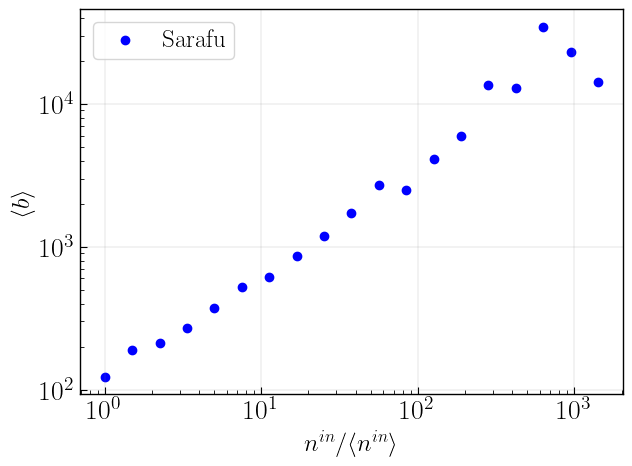

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = saragents['tx_in']
# data = data/data.sum()
# Creiamo bin logaritmici per tx_in
bins = np.logspace(np.log10(data.min()), 
                   np.log10(data.max()), num=20)

saragents['b_bin'] = pd.cut(data, bins, labels=bins[:-1], include_lowest=True)

# Calcoliamo la media di mean_balance per ogni bin di tx_in
df_grouped = saragents.groupby('b_bin')['mean_balance'].mean().reset_index()

# Convertiamo i bin in valori numerici per il plot
df_grouped['b_bin'] = df_grouped['b_bin'].astype(float)

# Plot
plt.figure(figsize=(7,5))
plt.scatter(df_grouped['b_bin'], df_grouped['mean_balance'], label='Sarafu', color='b')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$n^{in}/\langle n^{in} \rangle$')

plt.ylabel(r'$\langle b \rangle$')
plt.legend()
plt.grid(True)
plt.show()


In [1]:
data = saragents[['mean_frac_out','mean_balance']]

plot_scatter_kde(data[['mean_frac_out','mean_balance']].dropna().values)
plt.loglog()

NameError: name 'saragents' is not defined

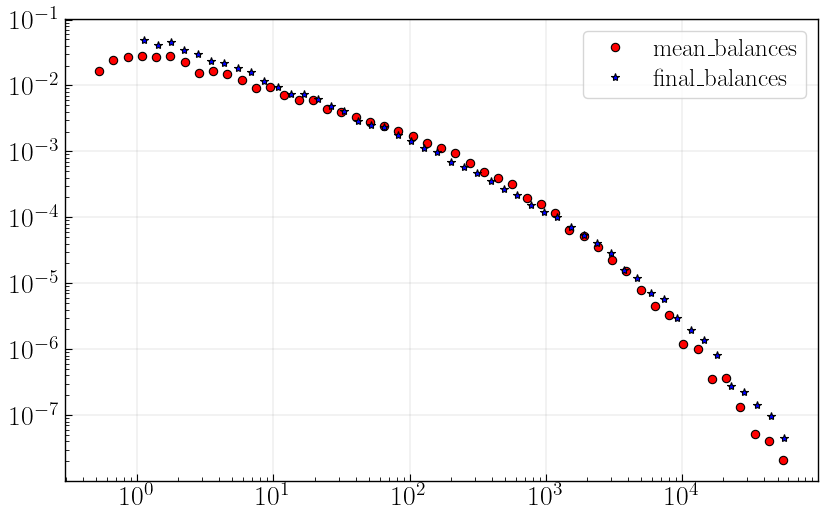

<Figure size 972x600 with 0 Axes>

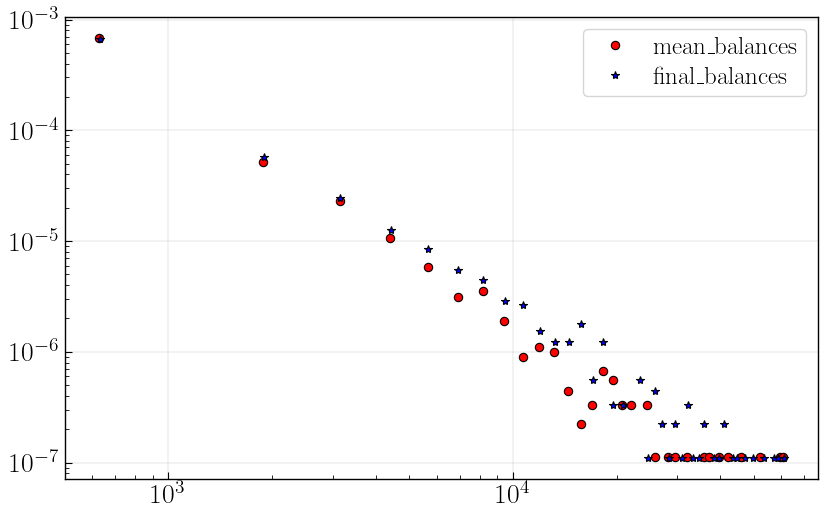

In [57]:
data = sim_results[find_key(0.25,1)]

mean_balances = []
for idx, user in data['filtered_balances'].groupby('crid'):
    mean_balances.append(user.balance.mean())

h = histogram(mean_balances, num_bins=50, density=True, log_bin=True)
h2 = histogram(data['balance_pivot'].iloc[:, -1].values, num_bins=50, density=True, log_bin=True)
plt.figure()
plt.loglog(h[0], h[1],'ro',label='mean_balances')
plt.loglog(h2[0], h2[1], 'b*',label='final_balances')
plt.legend()
plt.figure()
h = histogram(mean_balances, num_bins=50, density=True, log_bin=False)
h2 = histogram(data['balance_pivot'].iloc[:, -1].values, num_bins=50, density=True, log_bin=False)
plt.figure()
plt.loglog(h[0], h[1],'ro',label='mean_balances')
plt.loglog(h2[0], h2[1], 'b*',label='final_balances')
plt.legend()


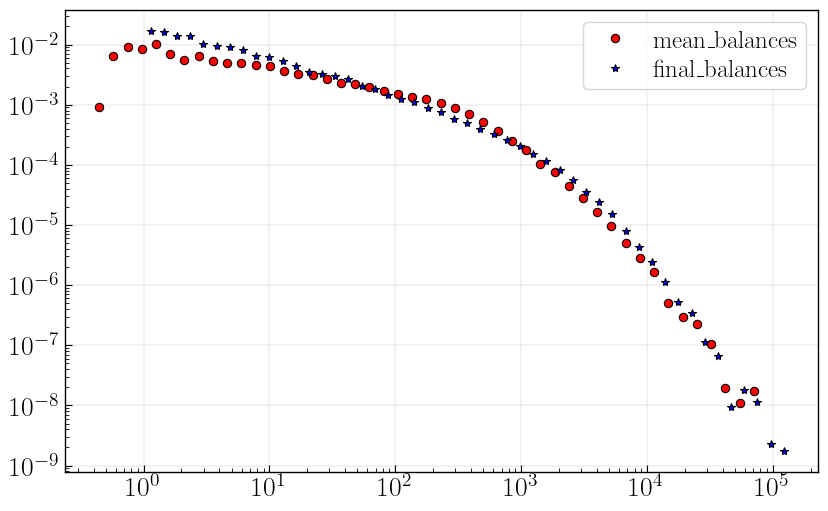

<Figure size 972x600 with 0 Axes>

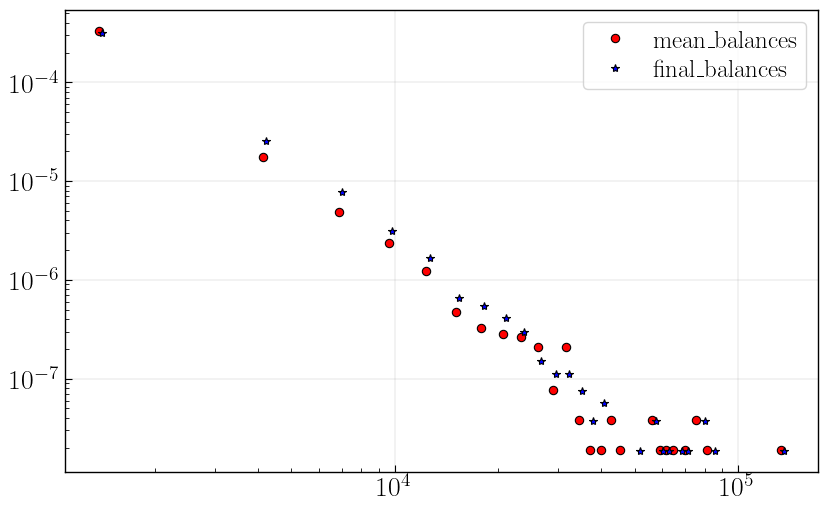

In [58]:
data = sim_results[find_key(1,1)]

mean_balances = []
for idx, user in data['filtered_balances'].groupby('crid'):
    mean_balances.append(user.balance.mean())

h = histogram(mean_balances, num_bins=50, density=True, log_bin=True)
h2 = histogram(data['balance_pivot'].iloc[:, -1].values, num_bins=50, density=True, log_bin=True)
plt.figure()
plt.loglog(h[0], h[1],'ro',label='mean_balances')
plt.loglog(h2[0], h2[1], 'b*',label='final_balances')
plt.legend()
plt.figure()
h = histogram(mean_balances, num_bins=50, density=True, log_bin=False)
h2 = histogram(data['balance_pivot'].iloc[:, -1].values, num_bins=50, density=True, log_bin=False)
plt.figure()
plt.loglog(h[0], h[1],'ro',label='mean_balances')
plt.loglog(h2[0], h2[1], 'b*',label='final_balances')
plt.legend()


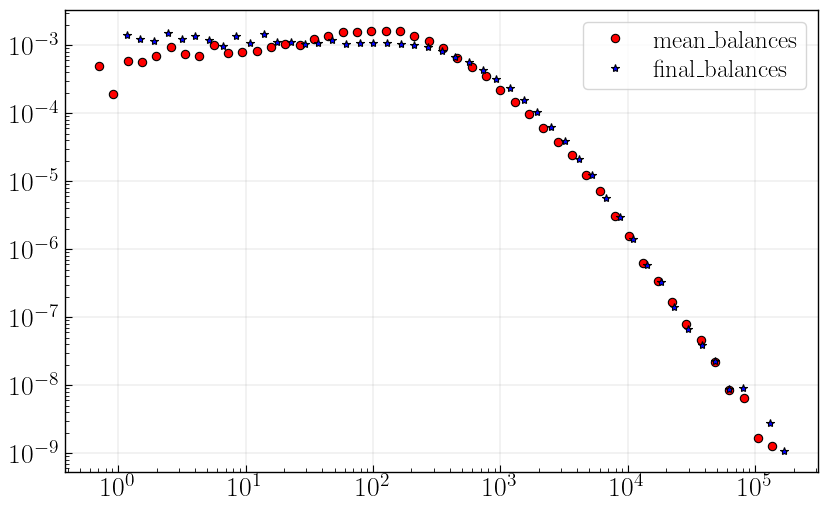

<Figure size 972x600 with 0 Axes>

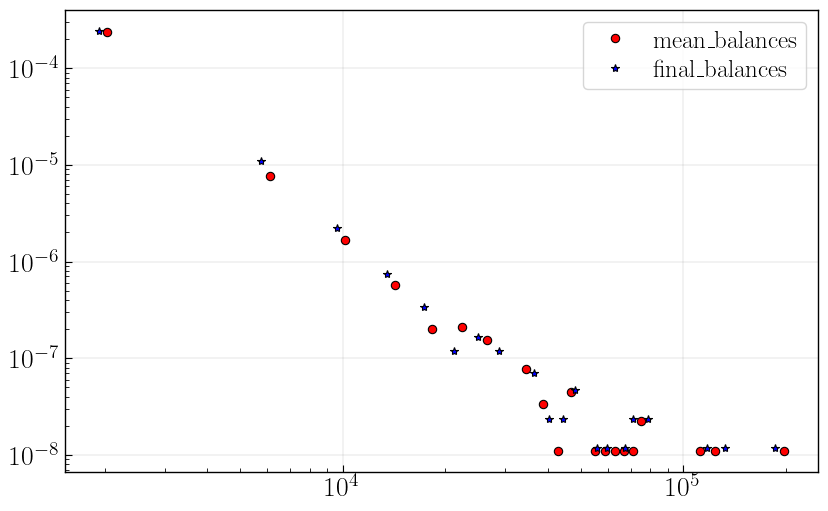

In [59]:
data = sim_results[find_key(1,250)]

mean_balances = []
for idx, user in data['filtered_balances'].groupby('crid'):
    mean_balances.append(user.balance.mean())

h = histogram(mean_balances, num_bins=50, density=True, log_bin=True)
h2 = histogram(data['balance_pivot'].iloc[:, -1].values, num_bins=50, density=True, log_bin=True)
plt.figure()
plt.loglog(h[0], h[1],'ro',label='mean_balances')
plt.loglog(h2[0], h2[1], 'b*',label='final_balances')
plt.legend()
plt.figure()
h = histogram(mean_balances, num_bins=50, density=True, log_bin=False)
h2 = histogram(data['balance_pivot'].iloc[:, -1].values, num_bins=50, density=True, log_bin=False)
plt.figure()
plt.loglog(h[0], h[1],'ro',label='mean_balances')
plt.loglog(h2[0], h2[1], 'b*',label='final_balances')
plt.legend()
